<p style="text-align:center; font-size:48px;">
LA ADICCIÓN A REDES SOCIALES
</h1>
</p>


<p align="center">
  <img src="src/img/redes_sociales_sin_cabezas.jpg" alt="Adicción a redes sociales" width="600" />
</p>

**📦Librerias necesarias**

In [78]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import scipy.stats as ss
from itertools import combinations

import sys
sys.path.append("./src/utils")
import bootcampviztools as bt
import toolbox as tl

In [79]:
import os
print(os.listdir("./src/utils"))

['bootcampviztools.py', 'toolbox.py', '__pycache__']


**1. Visualizacion general de mis datos**

Nos encontramos con un Dataset aparentemente limpio, detectamos una columna ID, hacemos una copia de seguridad y quitamos esta columna que no nos sera util. Nos encontramos con un problema supervisado de clasificacion multiclases

In [80]:
student = pd.read_csv("./src/data_sample/Students_Social_Media_Addiction.csv", sep = ",")
student.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [81]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [82]:
df= student.copy()

In [83]:
df.drop("Student_ID", axis = 1, inplace = True)

**2. Separamos nuestro dataset, e identificamos el target:**

In [84]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)
target = "Addicted_Score"

In [85]:
train_set.columns

Index(['Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours',
       'Most_Used_Platform', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

**3. Miremos el target:**

Nos encontramos frente a un problema de clasificacion multiclase, no balanceado. 

In [86]:
df[target].value_counts(normalize=True)

Addicted_Score
7    0.296454
8    0.204255
5    0.192908
4    0.117730
6    0.086525
9    0.078014
3    0.022695
2    0.001418
Name: proportion, dtype: float64

<Axes: xlabel='Addicted_Score', ylabel='count'>

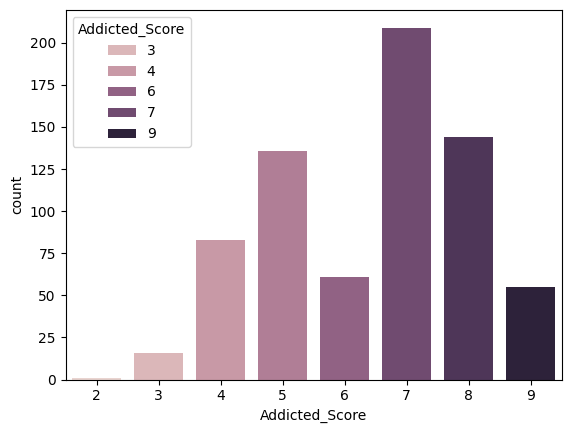

In [87]:
sns.countplot(x= df[target], data = df, hue = target)

**4. Realizamos un MINI EDA para conocer mejor nuestros datos**

    - comprension de las variables
    - analisis univariante
    - analisis bivariantes

4.1 Comprensión de las variables

In [88]:
tl.descripcion(df)

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
DATA_TYPE,int64,object,object,object,float64,object,object,float64,int64,object,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,7,2,3,110,67,12,2,59,6,3,6,8
CARD (%),0.99,0.28,0.43,15.6,9.5,1.7,0.28,8.37,0.85,0.43,0.85,1.13


In [89]:
tl.tipificacion_variables(df,10,30)

,Tipo_sugerido
Age,Categorica
Gender,Binaria
Academic_Level,Categorica
Country,Numerica discreta
Avg_Daily_Usage_Hours,Numerica discreta
Most_Used_Platform,Numerica discreta
Affects_Academic_Performance,Binaria
Sleep_Hours_Per_Night,Numerica discreta
Mental_Health_Score,Categorica
Relationship_Status,Categorica


In [90]:
for col in df: 
    print(f"for, {df[col].value_counts(normalize=True)}")
    print("*****************************")

for, Age
20    0.234043
19    0.231206
21    0.221277
22    0.208511
23    0.048227
24    0.036879
18    0.019858
Name: proportion, dtype: float64
*****************************
for, Gender
Female    0.500709
Male      0.499291
Name: proportion, dtype: float64
*****************************
for, Academic_Level
Undergraduate    0.500709
Graduate         0.460993
High School      0.038298
Name: proportion, dtype: float64
*****************************
for, Country
India          0.075177
USA            0.056738
Canada         0.048227
France         0.038298
Mexico         0.038298
                 ...   
Oman           0.001418
Afghanistan    0.001418
Syria          0.001418
Yemen          0.001418
Bhutan         0.001418
Name: proportion, Length: 110, dtype: float64
*****************************
for, Avg_Daily_Usage_Hours
4.7    0.043972
4.5    0.042553
4.8    0.041135
4.6    0.039716
4.4    0.038298
         ...   
8.1    0.001418
8.2    0.001418
8.3    0.001418
8.4    0.001418
8.5    0.

In [91]:
df["Country"].unique()

array(['Bangladesh', 'India', 'USA', 'UK', 'Canada', 'Australia',
       'Germany', 'Brazil', 'Japan', 'South Korea', 'France', 'Spain',
       'Italy', 'Mexico', 'Russia', 'China', 'Sweden', 'Norway',
       'Denmark', 'Netherlands', 'Belgium', 'Switzerland', 'Austria',
       'Portugal', 'Greece', 'Ireland', 'New Zealand', 'Singapore',
       'Malaysia', 'Thailand', 'Vietnam', 'Philippines', 'Indonesia',
       'Taiwan', 'Hong Kong', 'Turkey', 'Israel', 'UAE', 'Egypt',
       'Morocco', 'South Africa', 'Nigeria', 'Kenya', 'Ghana',
       'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador',
       'Uruguay', 'Paraguay', 'Bolivia', 'Costa Rica', 'Panama',
       'Jamaica', 'Trinidad', 'Bahamas', 'Iceland', 'Finland', 'Poland',
       'Romania', 'Hungary', 'Czech Republic', 'Slovakia', 'Croatia',
       'Serbia', 'Slovenia', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania',
       'Ukraine', 'Moldova', 'Belarus', 'Kazakhstan', 'Uzbekistan',
       'Kyrgyzstan', 'Tajikistan', 'A

| Columna/Variable | Descripción                                | Tipo de Categoria | Priorizacion | 
| ---------------- | ------------------------------------------ |--------------------|-------------------------------|
| Age              | Edad del estudiante                        | Numerica discreta| Baja| 
| Gender           | Genero del estudiante                     | Binaria| Media|
| Academic_Level   | Nivel academico (3 tipologias)            | Categorica | Alta| 
| Country          | Pays del estudiante                       |Categorica |Alta|
| Avg_Daily_Usage_Hours| Horas de uso de redes sociales al dia |Numerica continua| Alta|
| Most_Used_Platform   | Plataformas de coneccion              | Categorica | Media|
| Affects_Academic_Performance  | Si afecta resultados academicos | Binaria | Alta|
| Sleep_Hours_Per_Night| Horas de sueño                        | Numerica continua | Alta|
| Mental_Health_Score  | Evaluacion de 0 a 10                  | Categorica |Alta|
| Relationship_Status  | estado actual de relaciones (3 tipologias) |Categorica | Media |
| Conflicts_Over_Social_Media   | numero de conflicto con familiares sobre el uso de redes sociales |Categorica |Alta|
| Addicted_Score       | Clasificacion evaluacion adiccion de 0 a 10 |Categorica | Target|


4.2 Analisis Univariante

In [92]:
features_num = ["Avg_Daily_Usage_Hours",  "Sleep_Hours_Per_Night"]
features_cat = ["Country","Age", "Gender","Most_Used_Platform", "Academic_Level", "Affects_Academic_Performance", "Mental_Health_Score", "Relationship_Status", "Conflicts_Over_Social_Media"]

In [93]:
train_set[features_cat].mode().T

,0
Country,India
Age,20
Gender,Female
Most_Used_Platform,Instagram
Academic_Level,Undergraduate
Affects_Academic_Performance,Yes
Mental_Health_Score,6
Relationship_Status,Single
Conflicts_Over_Social_Media,3


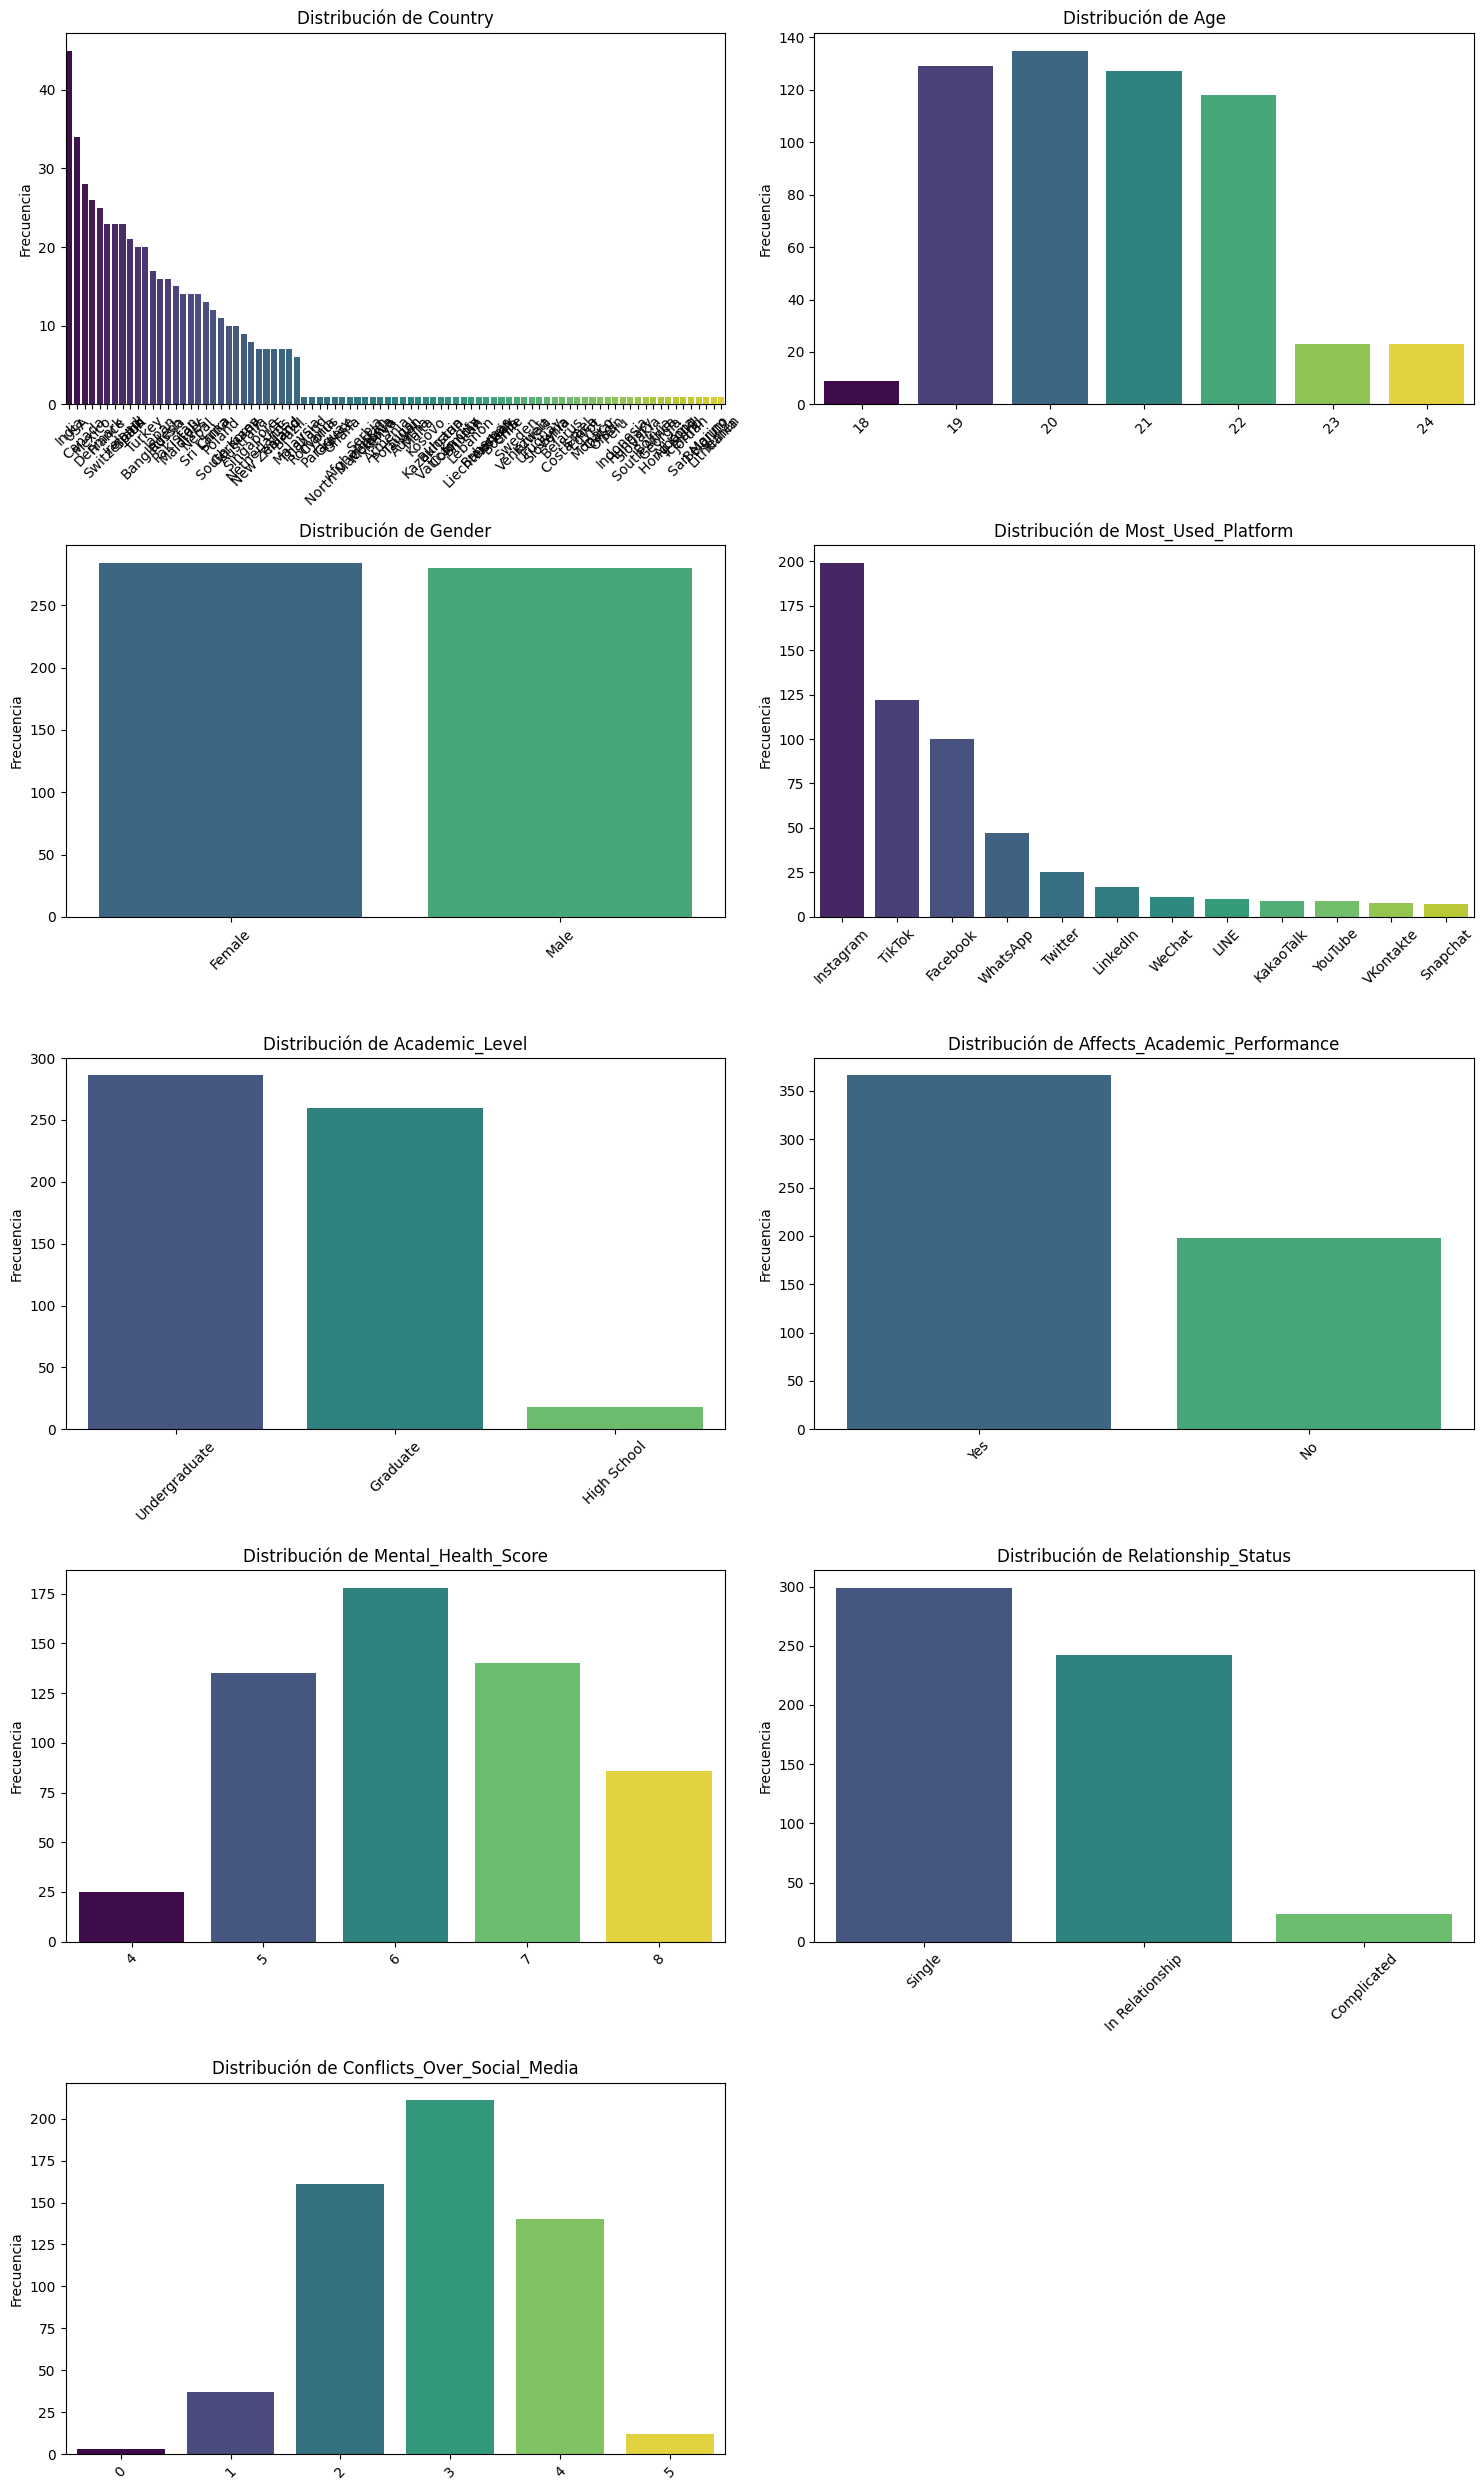

In [94]:
bt.pinta_distribucion_categoricas(train_set, features_cat, relativa=False, mostrar_valores=False)

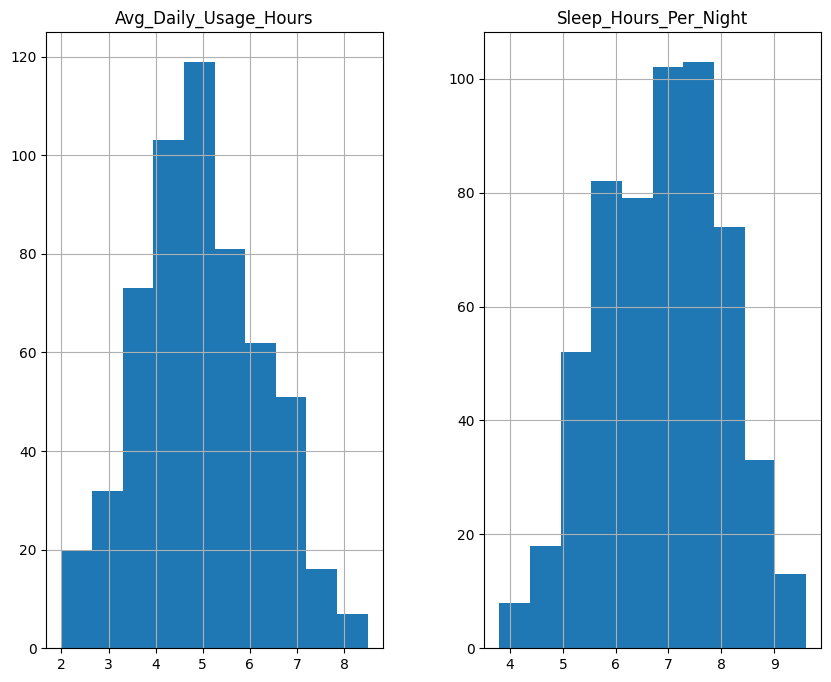

In [95]:
train_set[features_num].hist(figsize=(10,8));
# cuidado algunas engañan porque no son numericas. Son categoricas, por esto usamos nuestra lista! 
# su forma es normal y no necesitaran log

In [96]:
train_set.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,20.668440,4.937411,6.864894,6.225177,2.858156,6.453901
std,1.389505,1.285236,1.148715,1.107381,0.954239,1.588033
min,18.000000,2.000000,3.800000,4.000000,0.000000,3.000000
25%,20.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.850000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,8.000000,5.000000,9.000000


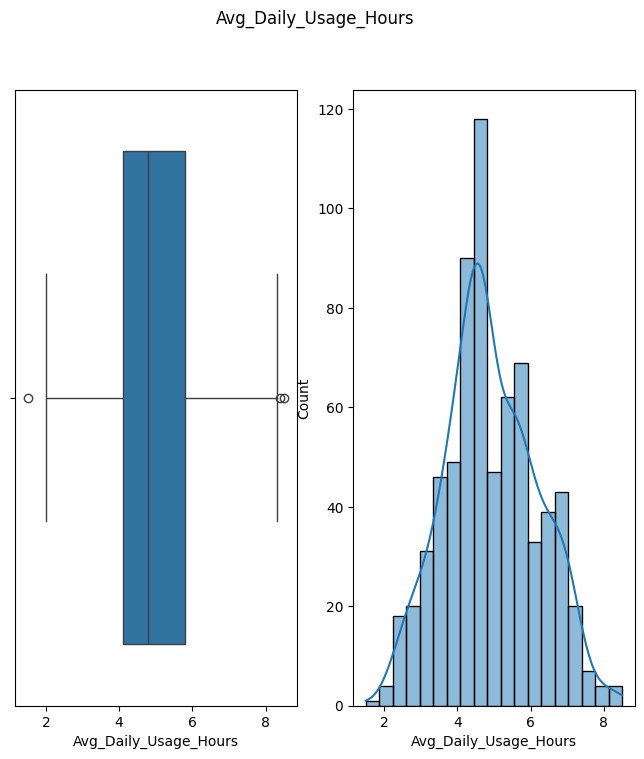

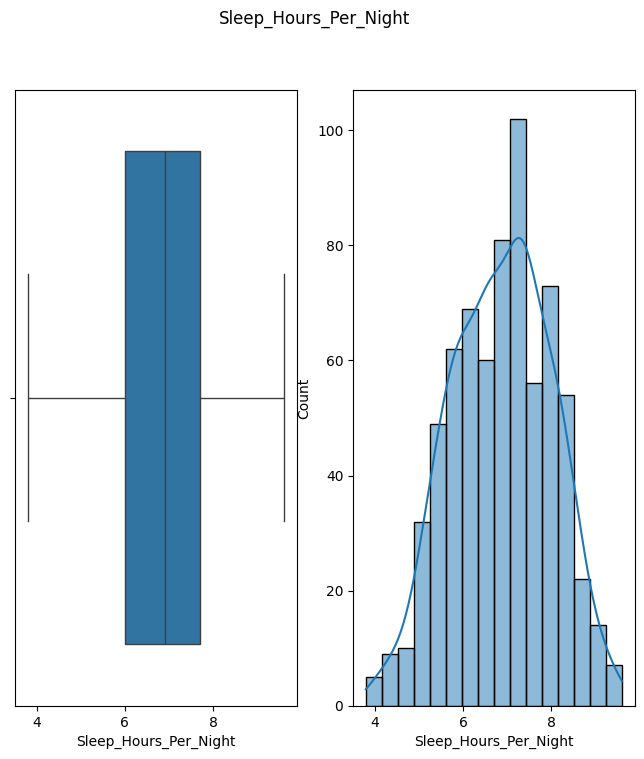

In [97]:
for columna in features_num:
    fig, axes = plt.subplots (1,2, figsize=(8,8) )
    plt.suptitle(columna)
    sns.boxplot(x= columna, data = student, ax=axes[0])
    sns.histplot( data = student,x=columna, kde=True,  bins= "auto", ax=axes[1]);

4.3 Analisis bivariantes

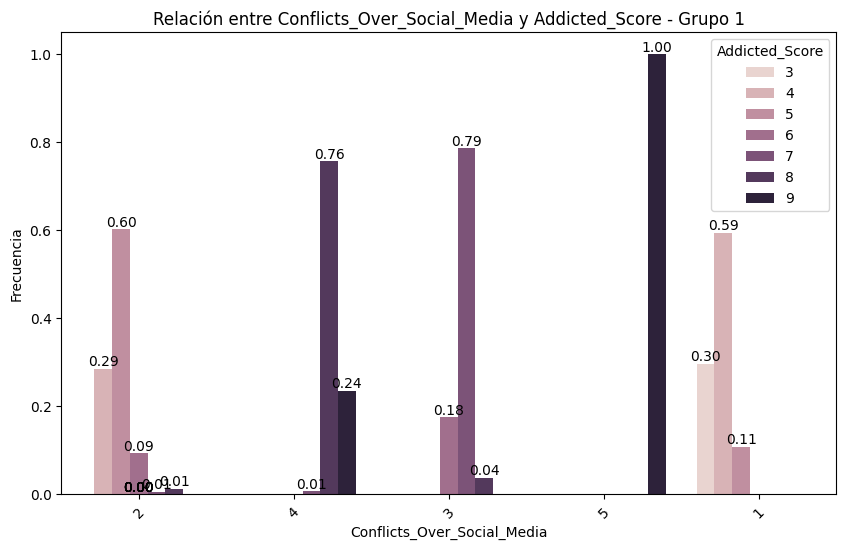

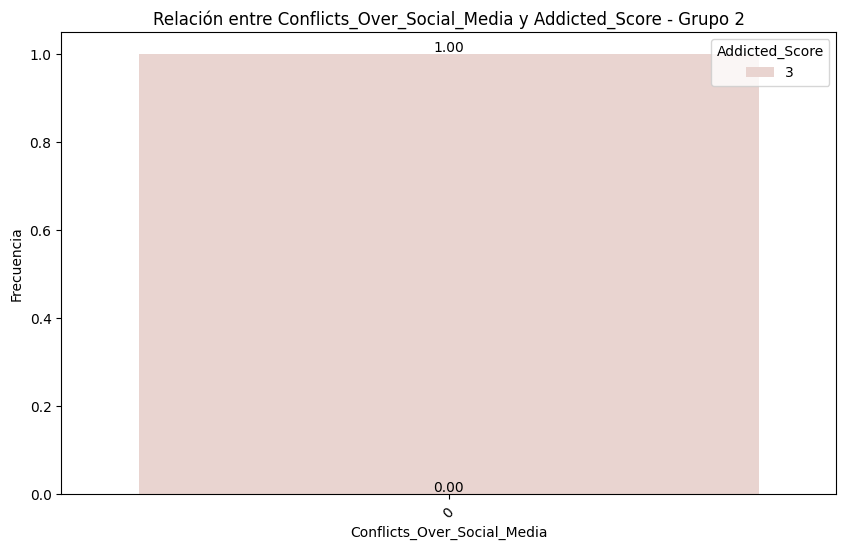

In [98]:
features_important_cat= []
less_important_features= []
bt.plot_categorical_relationship_fin(train_set, "Conflicts_Over_Social_Media",target, show_values= True, relative_freq= True)
features_important_cat.append("Conflicts_Over_Social_Media") # relevante

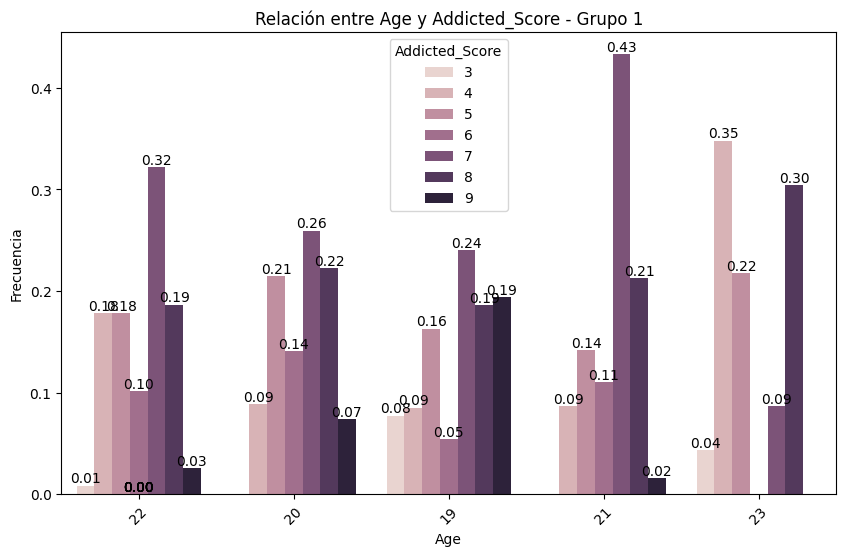

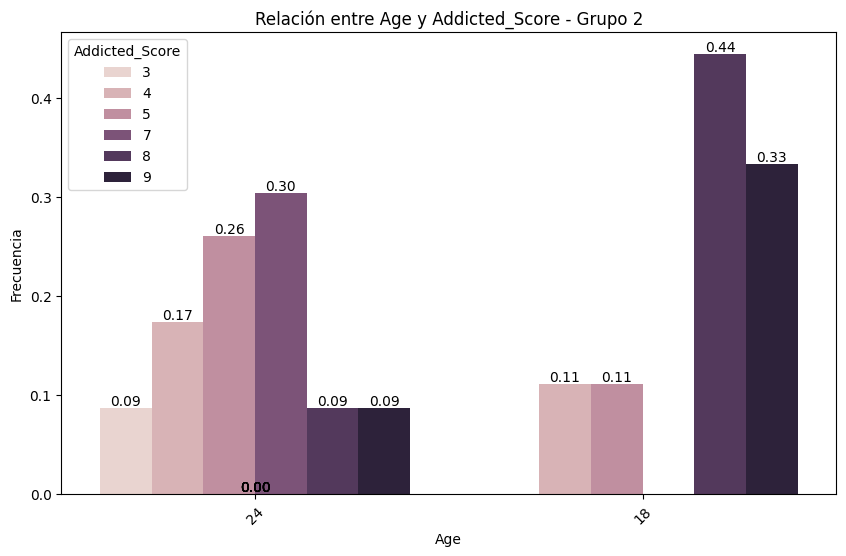

In [99]:
bt.plot_categorical_relationship_fin(train_set, "Age",target, show_values= True, relative_freq= True)
less_important_features.append("Age")
# AGE no me parece tener una clara dependencia visualmente, no la guardamos


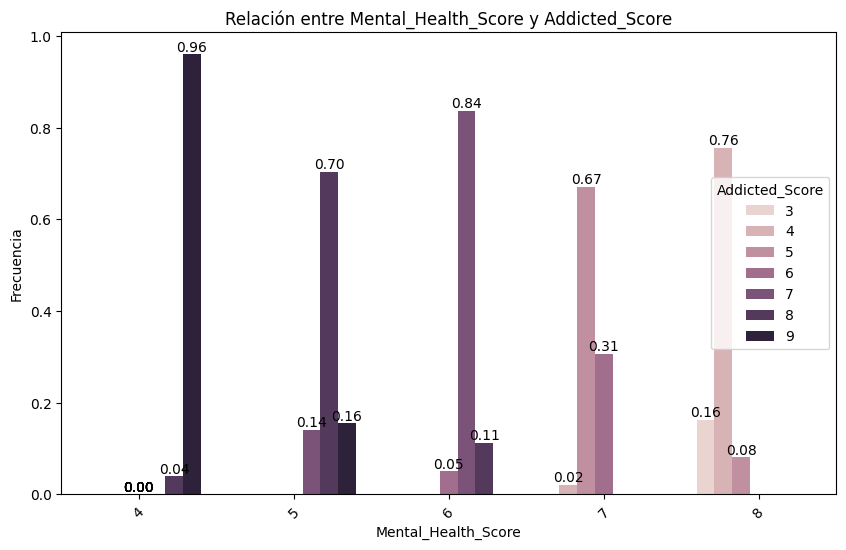

In [100]:
bt.plot_categorical_relationship_fin(train_set, "Mental_Health_Score",target, show_values= True, relative_freq= True)
features_important_cat.append("Mental_Health_Score") # relevante

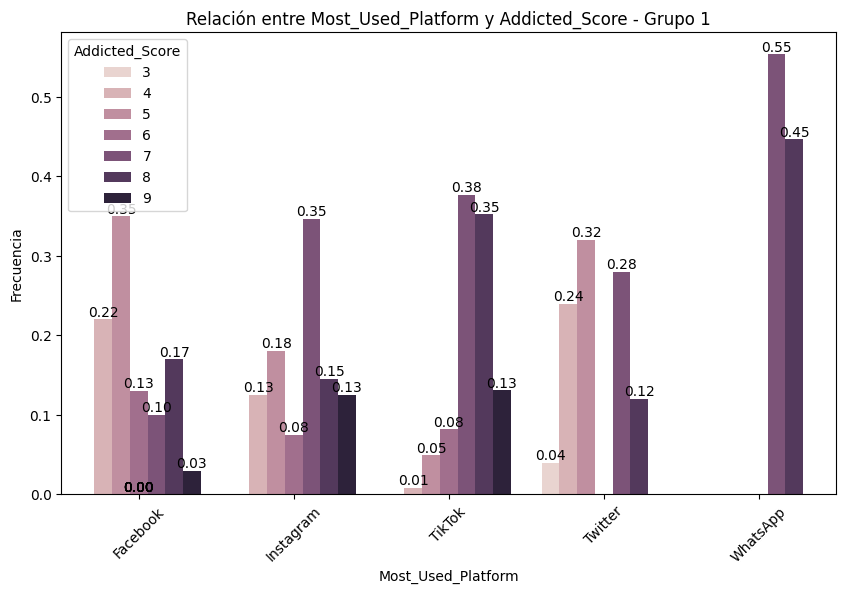

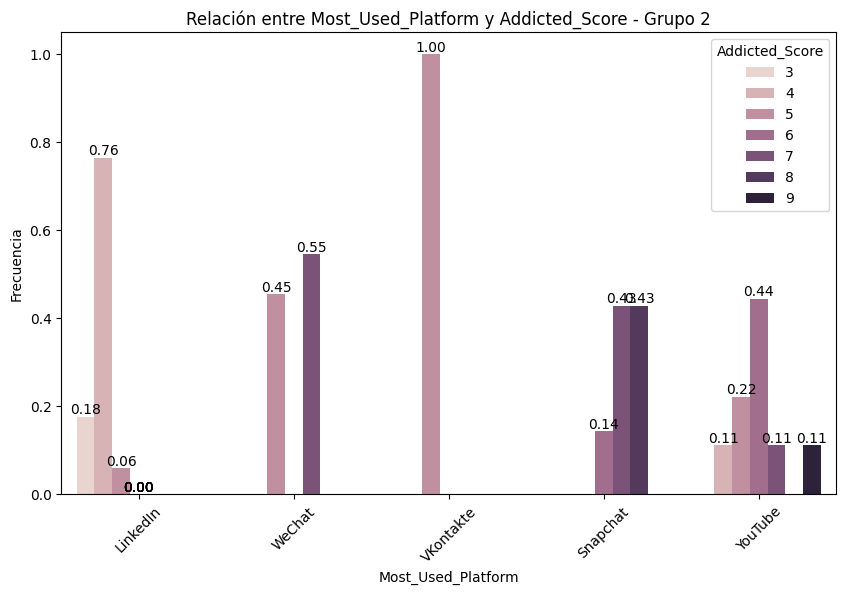

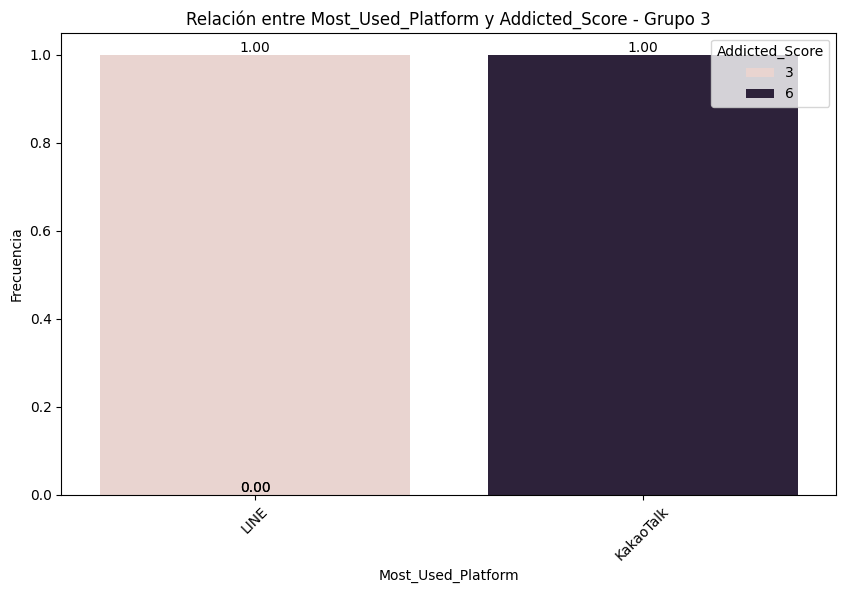

In [101]:
bt.plot_categorical_relationship_fin(train_set, "Most_Used_Platform",target, show_values= True, relative_freq= True)
features_important_cat.append("Most_Used_Platform")#medio relevante si

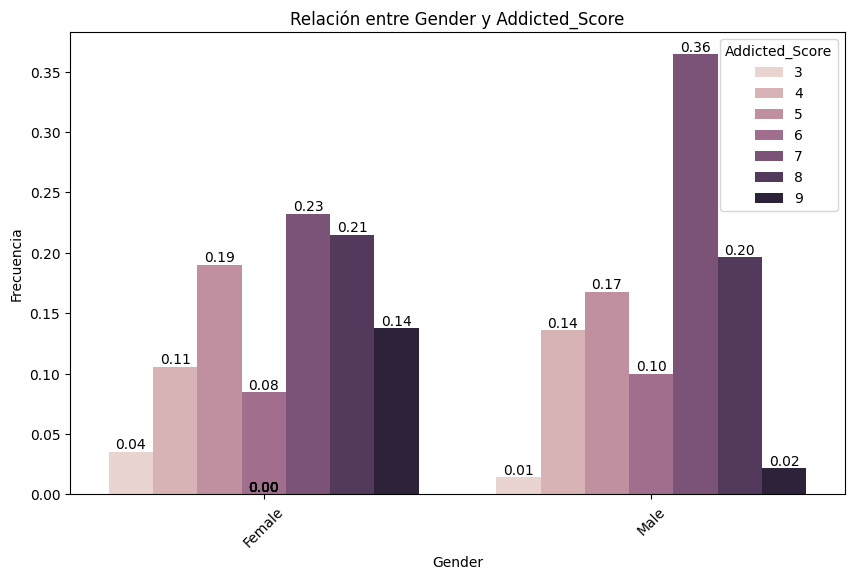

In [102]:
bt.plot_categorical_relationship_fin(train_set, "Gender",target, show_values= True, relative_freq= True)
features_important_cat.append("Gender") #medio relevante si

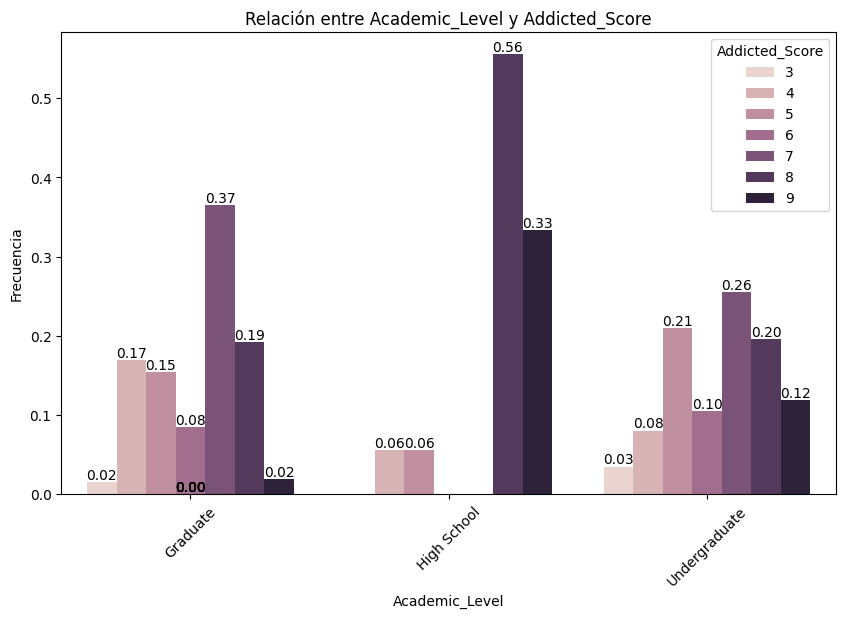

In [103]:
bt.plot_categorical_relationship_fin(train_set, "Academic_Level",target, show_values= True, relative_freq= True)
features_important_cat.append("Academic_Level") # relevante

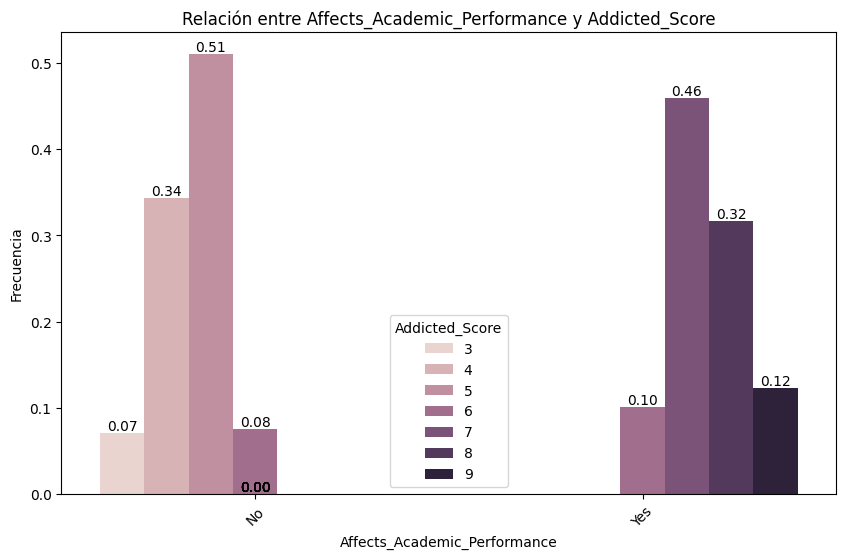

In [104]:
bt.plot_categorical_relationship_fin(train_set, "Affects_Academic_Performance",target, show_values= True, relative_freq= True)
features_important_cat.append("Affects_Academic_Performance") # relevante

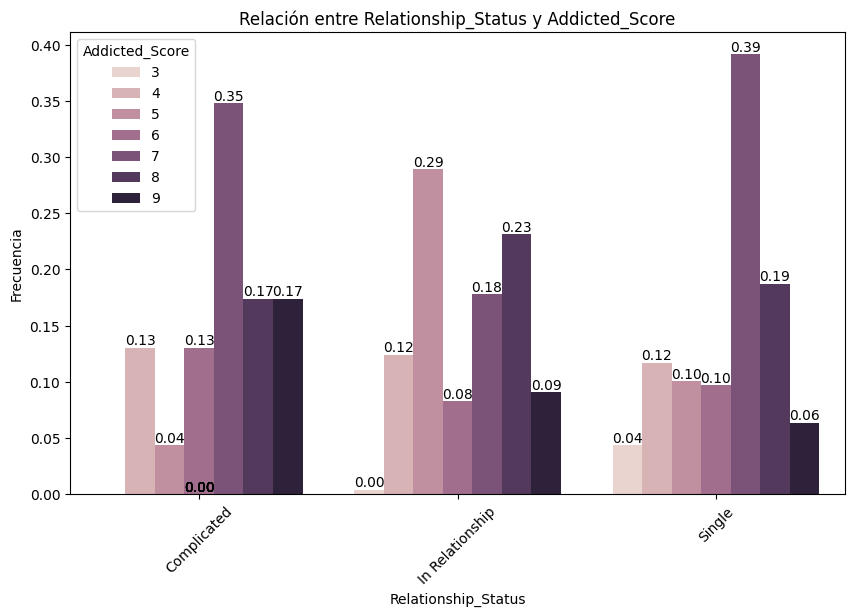

In [105]:
bt.plot_categorical_relationship_fin(train_set, "Relationship_Status",target, show_values= True, relative_freq= True)
features_important_cat.append("Relationship_Status") # medio relevante si



In [106]:
# Calculo de correlacion entre variantes categoricas .  CRAMERS
def cramers_v(x, y):
    # Contingency table
    confusion = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion, correction=False)[0]
    n = confusion.sum().sum()
    k = min(confusion.shape)
    return np.sqrt(chi2 / (n * (k - 1)))


results = []

for feat1, feat2 in combinations(features_cat, 2):
    v = cramers_v(train_set[feat1], train_set[feat2])
    results.append({
        'Fear1': feat1,
        'Feat2': feat2,
        'CramersV': v
    })

df_cramers = pd.DataFrame(results).sort_values('CramersV', ascending=False)
df_cramers

,Fear1,Feat2,CramersV
32,Affects_Academic_Performance,Conflicts_Over_Social_Media,0.988477
30,Affects_Academic_Performance,Mental_Health_Score,0.908662
6,Country,Relationship_Status,0.843713
4,Country,Affects_Academic_Performance,0.835827
10,Age,Academic_Level,0.812604
3,Country,Academic_Level,0.786456
2,Country,Most_Used_Platform,0.767901
5,Country,Mental_Health_Score,0.701725
8,Age,Gender,0.695435
34,Mental_Health_Score,Conflicts_Over_Social_Media,0.694837


In [107]:
corr = train_set[features_num+[target]].corr(numeric_only= True)
np.abs(corr[target].sort_values(ascending = False))


Addicted_Score           1.000000
Avg_Daily_Usage_Hours    0.832511
Sleep_Hours_Per_Night    0.764260
Name: Addicted_Score, dtype: float64

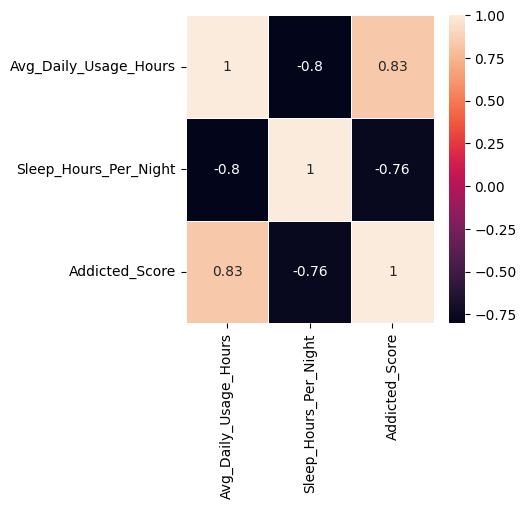

In [108]:
#correlation map - cuidado a las falsas numericas que en realidad son categoricas, de las numericas, eligimos solo 1, la mas correlada con target, o sea "Avg_Daily_usage_Hours"
plt.figure(figsize=(4, 4))
sns.heatmap(train_set[features_num+[target]].corr(numeric_only=True), annot=True, linewidths=.5);

In [109]:
less_important_features.append("Sleep_Hours_Per_Night")

In [110]:
features_important_num= ["Avg_Daily_Usage_Hours"]

In [111]:
features_important_cat

['Conflicts_Over_Social_Media',
 'Mental_Health_Score',
 'Most_Used_Platform',
 'Gender',
 'Academic_Level',
 'Affects_Academic_Performance',
 'Relationship_Status']

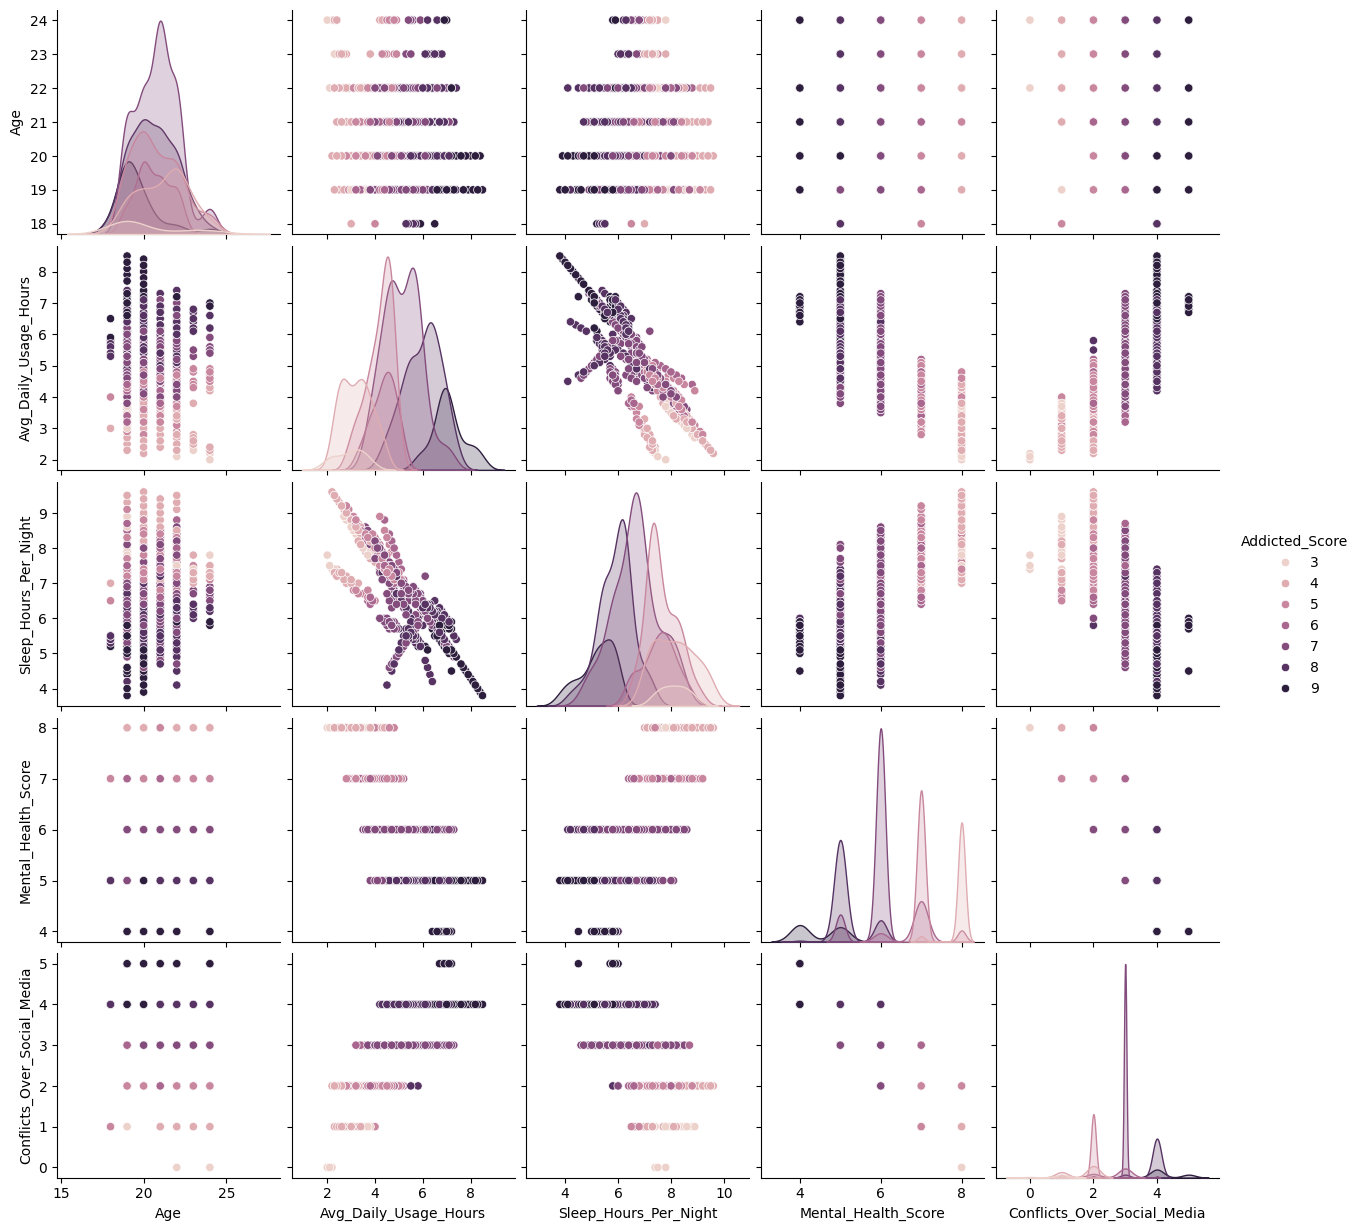

In [112]:
sns.pairplot(train_set, hue = target);

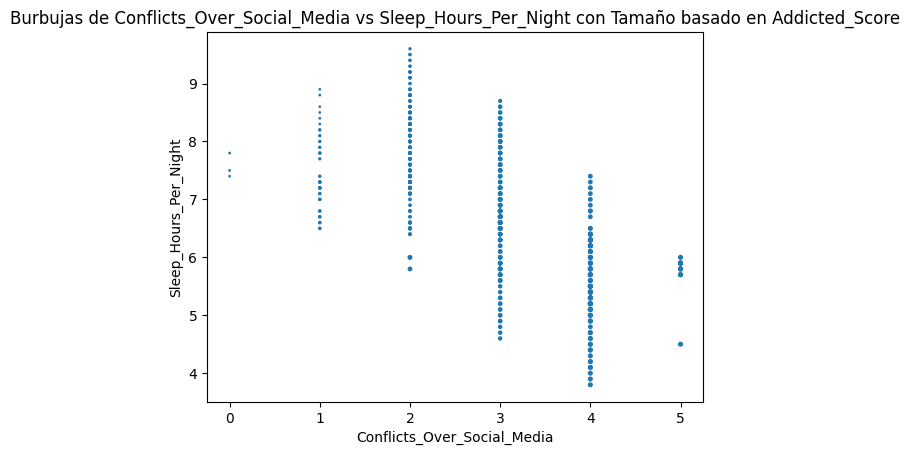

In [113]:
bt.bubble_plot(train_set, "Conflicts_Over_Social_Media", "Sleep_Hours_Per_Night","Addicted_Score",scale = 1 )

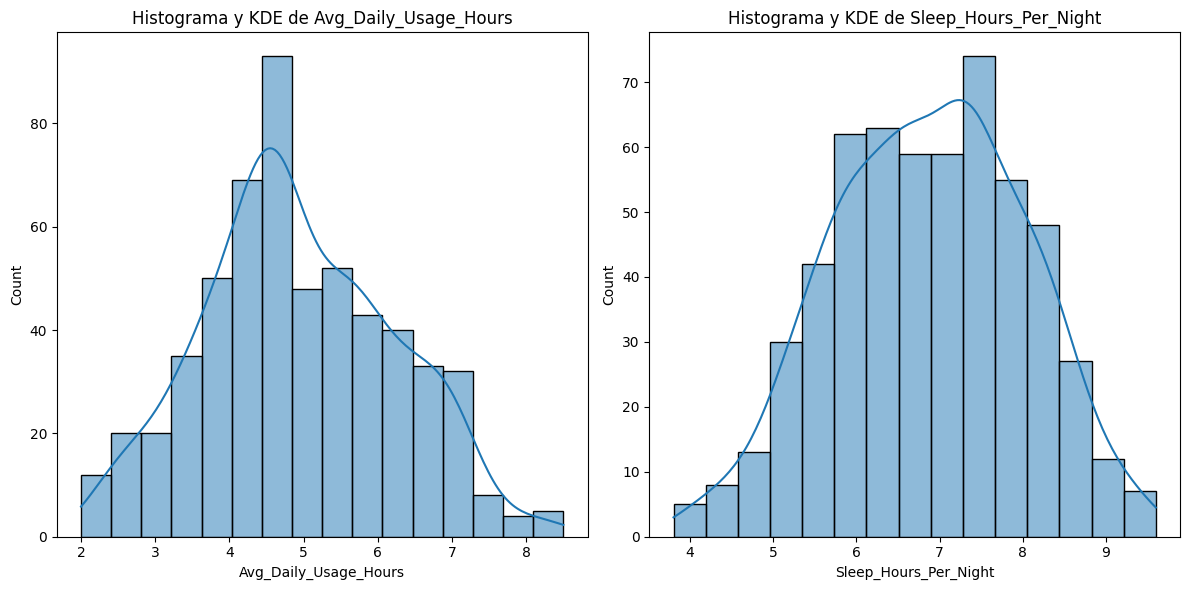

In [114]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_histo_den(train_set,features_num)

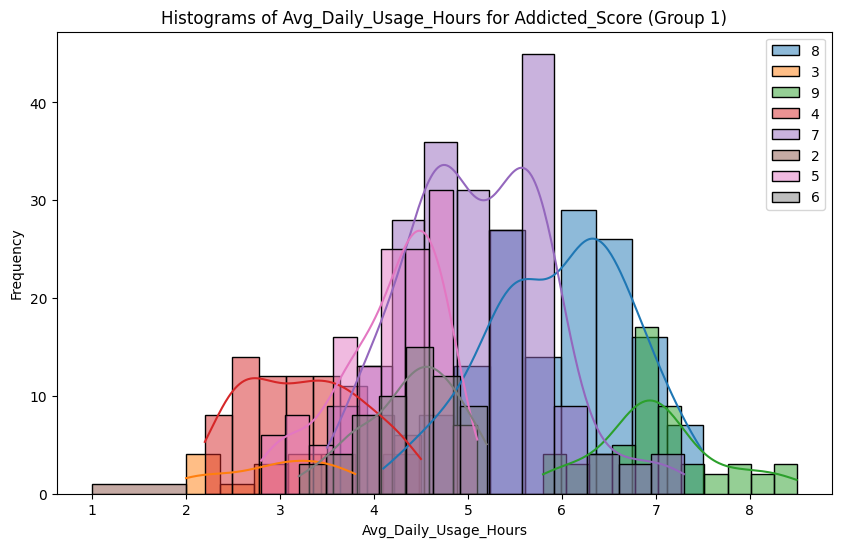

In [115]:
fig = bt.plot_grouped_histograms(student,cat_col= target, num_col="Avg_Daily_Usage_Hours", group_size=8)


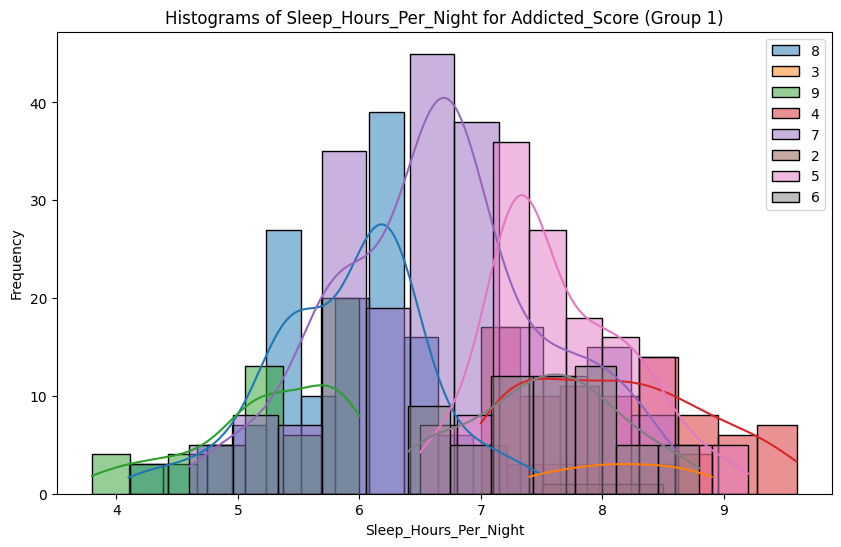

In [116]:
bt.plot_grouped_histograms(student,cat_col= "Addicted_Score", num_col="Sleep_Hours_Per_Night", group_size=8)

In [117]:
features_num

['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night']

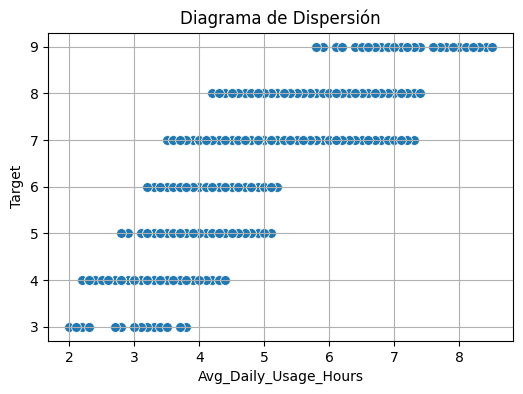

In [118]:
#correlacion de numericas Exam_Score y Hours Studied - scatter plot

plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_set, x="Avg_Daily_Usage_Hours", y=target, s=50)
plt.title('Diagrama de Dispersión')
plt.xlabel("Avg_Daily_Usage_Hours")
plt.ylabel("Target")
plt.grid(True)
plt.show()




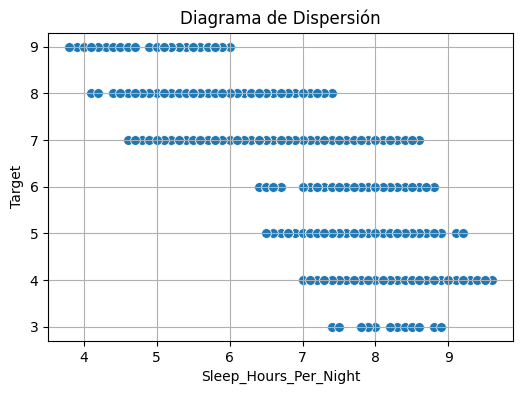

In [119]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_set, x="Sleep_Hours_Per_Night", y= target, s=50)
plt.title('Diagrama de Dispersión')
plt.xlabel("Sleep_Hours_Per_Night")
plt.ylabel("Target")
plt.grid(True)
plt.show()

In [120]:
# TRANSFORMACIONES - importante, tenemos en cuenta posibles outliers a futuro 
# COUNTRY 

country_to_continent = {
    #Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Cyprus': 'Asia', 'Georgia': 'Asia',
    'India': 'Asia', 'Indonesia': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia',
    'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Lebanon': 'Asia', 'Malaysia': 'Asia', 'Maldives': 'Asia',
    'Nepal': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Philippines': 'Asia',
    'Qatar': 'Asia', 'Singapore': 'Asia', 'South Korea': 'Asia', 'Sri Lanka': 'Asia',
    'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia', 'Thailand': 'Asia',
    'Turkey': 'Asia', 'UAE': 'Asia', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia',
    'Yemen': 'Asia',
    # Africa
    'Egypt': 'Africa', 'Ghana': 'Africa', 'Kenya': 'Africa',
    'Morocco': 'Africa', 'Nigeria': 'Africa', 'South Africa': 'Africa', 'Argelia': 'Africa', 'Angola': 'Africa','Benin': 'Africa', 'Botswana': 'Africa','Burkina Faso': 'Africa','Burundi': 'Africa', 'Cape Verde': 'Africa', 'Cameroon': 'Africa', 'Chad': 'Africa',
    'Comoros': 'Africa','Republic of the Congo': 'Africa',
    # North America
    'Bahamas':'North America', 'Canada': 'North America', 'Costa Rica': 'North America','Jamaica': 'North America', 'Mexico': 'North America', 'Panama': 'North America',
    'Trinidad': 'North America', 'USA': 'North America',
    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Paraguay': 'South America', 'Peru': 'South America', 'Uruguay': 'South America',
    'Venezuela': 'South America',
    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Bosnia': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe', 'Finland': 'Europe',
    'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe', 'Kosovo': 'Europe',
    'Latvia': 'Europe', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Malta': 'Europe', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe',
    'Netherlands': 'Europe', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Romania': 'Europe', 'San Marino': 'Europe', 'Serbia': 'Europe',
    'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Ukraine': 'Europe', 'UK': 'Europe', 'Vatican City': 'Europe',
    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania'
}

train_set['Continent'] = train_set['Country'].map(country_to_continent)
test_set['Continent'] = test_set['Country'].map(country_to_continent)
train_set.drop(columns="Country", inplace=True)
test_set.drop(columns="Country", inplace=True)

In [121]:
features_cat.remove("Country")
features_cat.append("Continent")

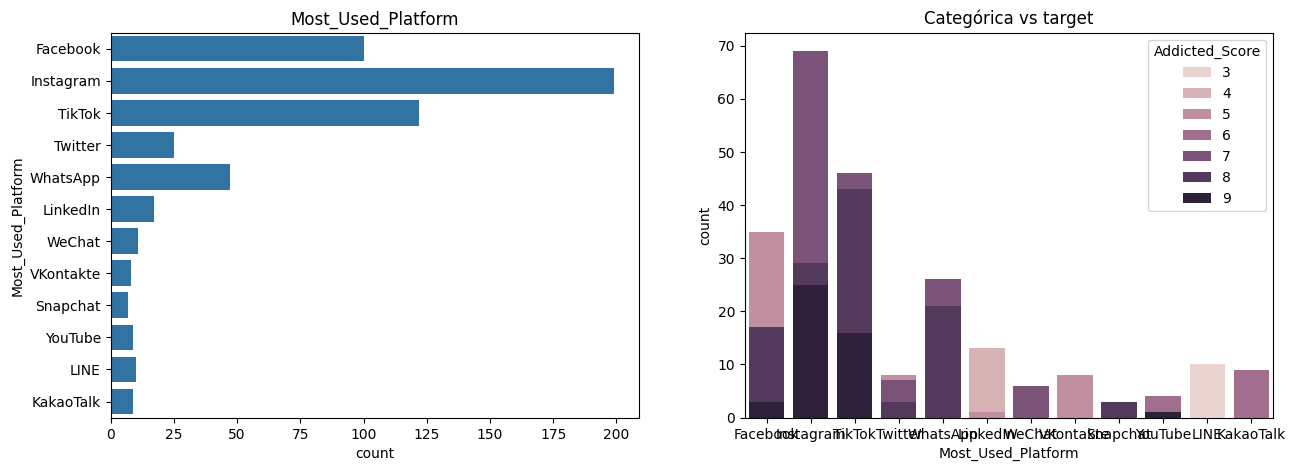

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(train_set["Most_Used_Platform"], ax=axes[0])
axes[0].set_title("Most_Used_Platform")

# Categorica vs target
sns.countplot(x=train_set["Most_Used_Platform"], hue=train_set[target], ax=axes[1], dodge=False)
axes[1].set_title("Categórica vs target");

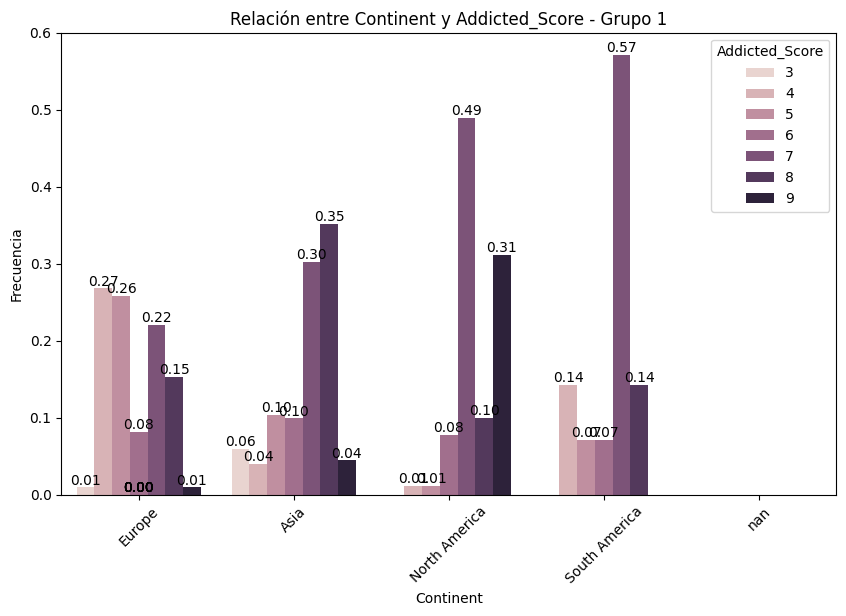

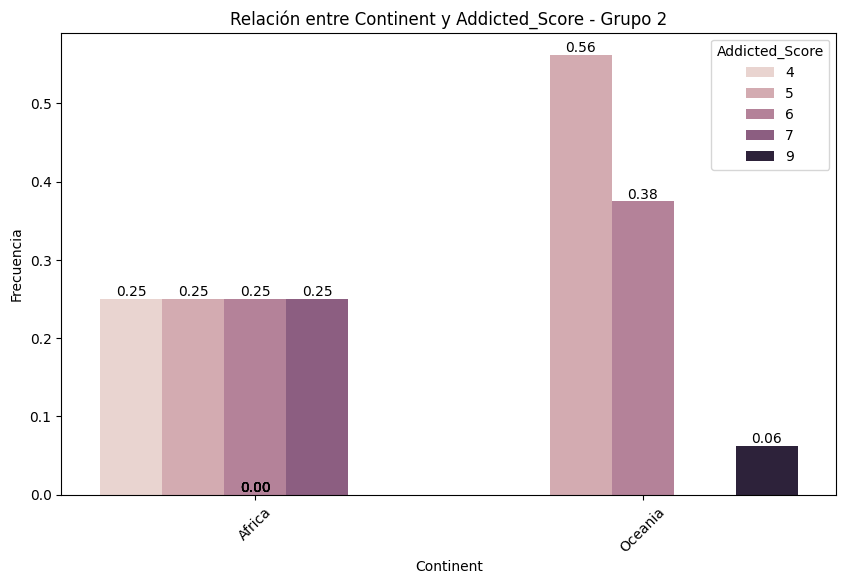

In [123]:
bt.plot_categorical_relationship_fin(train_set, "Continent",target, show_values= True, relative_freq= True)
features_important_cat.append("Continent") # relevante

In [124]:
# AGE
bins_dep = [-1, 18, 19, 20, 21, 22 , float("inf")]
labels_dep = ["hasta 18", 19, 20, 21, 22, "23 y mas"]
train_set["Age"] = pd.cut(train_set["Age"], bins=bins_dep, labels=labels_dep)
test_set["Age"] = pd.cut(test_set["Age"], bins=bins_dep, labels=labels_dep)

In [125]:
# GENDER - (Male = 0, Female =1, no hace flata transmorar ahora)
train_set["Gender"].value_counts()
train_set["Gender_female"] = train_set["Gender"].replace({"Male": 0, 
    "Female": 1
})

test_set["Gender_female"] = test_set["Gender"].replace({"Male": 0, 
    "Female": 1
})

train_set.drop(columns= "Gender", inplace=True)
test_set.drop(columns= "Gender", inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17124\1583070184.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set["Gender_female"] = train_set["Gender"].replace({"Male": 0,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17124\1583070184.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set["Gender_female"] = test_set["Gender"].replace({"Male": 0,


In [126]:
# AFFECTS_ACADEMNIC_PERFORMANCE
train_set["Affects_Academic_Performance"] = train_set["Affects_Academic_Performance"].replace({
    "No": 0, 
    "Yes": 1
})

test_set["Affects_Academic_Performance"]= test_set["Affects_Academic_Performance"].replace({
    "No": 0, 
    "Yes": 1
})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17124\3146852934.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set["Affects_Academic_Performance"] = train_set["Affects_Academic_Performance"].replace({
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17124\3146852934.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set["Affects_Academic_Performance"]= test_set["Affects_Academic_Performance"].replace({


In [127]:
# MOST_USED_PLATFORM 
mapped_platform= {
"Instagram": "Instagram",
"TikTok": "TikTok",
"Facebook": "Facebook",
"Whatsapp": "Others",
"Twitter": "Others",
"LinkedIn": "Others" ,
"WeChat": "Others",
"LINE": "Others", 
"KakaoTalk": "Others" ,
"YouTube": "Others" , 
"VKontakte": "Others", 
"Snapchat": "Others" }

train_set['Most_Used_Platform'] = train_set['Most_Used_Platform'].map(mapped_platform)
test_set['Most_Used_Platform'] = test_set['Most_Used_Platform'].map(mapped_platform)


In [128]:
# MENTAL_HEALTH_SCORE
bins_dep = [0, 4, 6,  float("inf")]
labels_dep = ["Poor", "Moderate", "Good"]
train_set["Mental_Health_Score"] = pd.cut(train_set["Mental_Health_Score"], bins=bins_dep, labels=labels_dep)
test_set["Mental_Health_Score"] = pd.cut(test_set["Mental_Health_Score"], bins=bins_dep, labels=labels_dep)
    


In [129]:
# TARGET - ADDCITED_SCORE (where 0 = "not addicted", 1 = "Moderate", 2 = "Addicted")
bins_dep = [0, 4, 7,  float("inf")]
labels_dep = [0, 1, 2]
train_set["Addicted_Score"] = pd.cut(train_set["Addicted_Score"], bins=bins_dep, labels=labels_dep)
test_set["Addicted_Score"] = pd.cut(test_set["Addicted_Score"], bins=bins_dep, labels=labels_dep)
    

In [130]:
# CONFLICTS_OVER_SOCIAL_MEDIA - esta ordenada, no haria falta transformarla, podriamos dejar numerica y quitarla del One-Hot-Encoding
#bins_dep = [0, 1, 3,  float("inf")]
#labels_dep = ["Not_Significant", "COUPLE", "SEVERAL"]
#train_set["Conflicts_Over_Social_Media"] = pd.cut(train_set["Conflicts_Over_Social_Media"], bins=bins_dep, labels=labels_dep)
#test_set["Conflicts_Over_Social_Media"] = pd.cut(test_set["Conflicts_Over_Social_Media"], bins=bins_dep, labels=labels_dep)
    

In [131]:
transformed_cat = ["Continent", "Age","Academic_Level", "Most_Used_Platform", "Mental_Health_Score", "Relationship_Status" ]
for col in transformed_cat:
    train_set= pd.get_dummies(train_set, columns=[col], drop_first=True, dtype=int)
    test_set= pd.get_dummies(test_set, columns=[col], drop_first=True, dtype=int)

In [132]:
train_set.columns.to_list()
features_cat = [col for col in train_set.columns.to_list() if col not in features_num]
features_cat.remove("Addicted_Score")

In [133]:
#verificamos que tenemos todas las mismas columnas en test_set que en train.
train_set.columns

Index(['Avg_Daily_Usage_Hours', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Conflicts_Over_Social_Media',
       'Addicted_Score', 'Gender_female', 'Continent_Asia', 'Continent_Europe',
       'Continent_North America', 'Continent_Oceania',
       'Continent_South America', 'Age_19', 'Age_20', 'Age_21', 'Age_22',
       'Age_23 y mas', 'Academic_Level_High School',
       'Academic_Level_Undergraduate', 'Most_Used_Platform_Instagram',
       'Most_Used_Platform_Others', 'Most_Used_Platform_TikTok',
       'Mental_Health_Score_Moderate', 'Mental_Health_Score_Good',
       'Relationship_Status_In Relationship', 'Relationship_Status_Single'],
      dtype='object')

In [134]:
new_categoric = [col for col in train_set.columns.to_list() if col not in features_num and col != target]

In [135]:
train_set

,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Conflicts_Over_Social_Media,Addicted_Score,Gender_female,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,...,Age_23 y mas,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_Others,Most_Used_Platform_TikTok,Mental_Health_Score_Moderate,Mental_Health_Score_Good,Relationship_Status_In Relationship,Relationship_Status_Single
24,3.2,0,6.9,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
155,4.2,1,7.4,4,2,1,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
210,6.3,1,4.4,4,2,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1
260,6.6,1,5.6,4,2,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
424,2.9,0,8.9,2,0,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,3.2,0,6.8,2,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
106,3.8,0,6.6,2,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
270,4.5,0,7.3,2,1,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,1
435,4.4,1,7.8,3,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [136]:
len(train_set.columns.to_list())

25

In [137]:
len(test_set.columns.to_list())

25

4.4 Nuevo analisis bi-variantes con las nuevas features creadas.

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


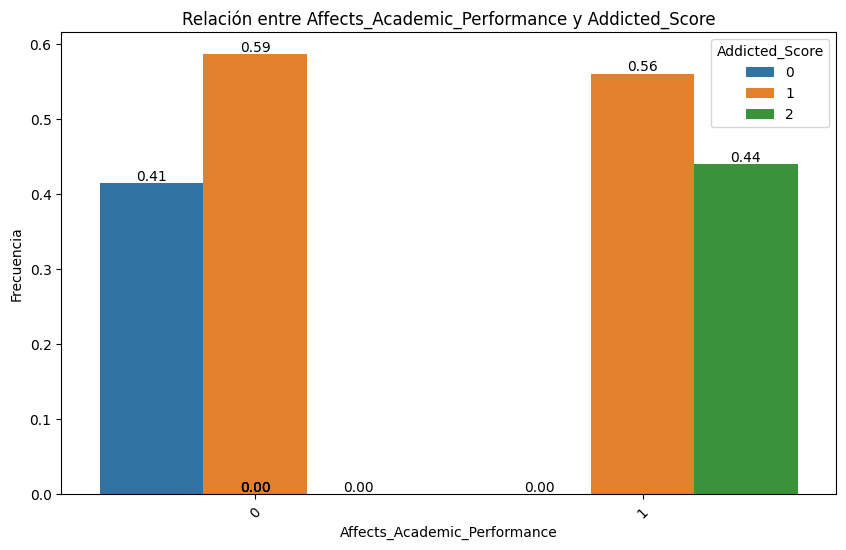

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


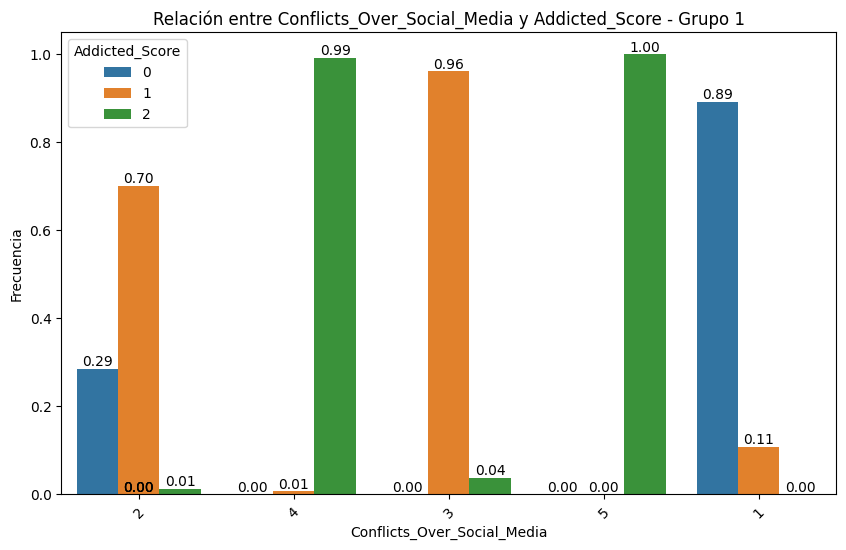

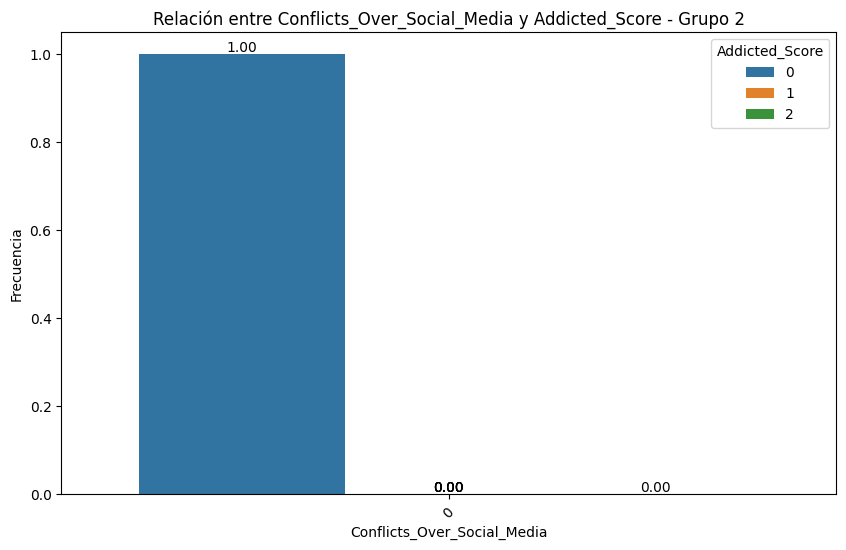

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


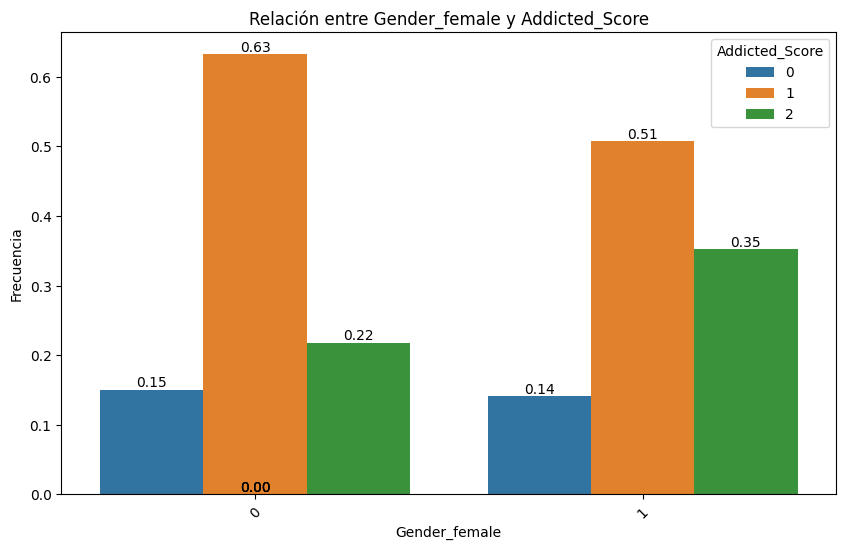

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


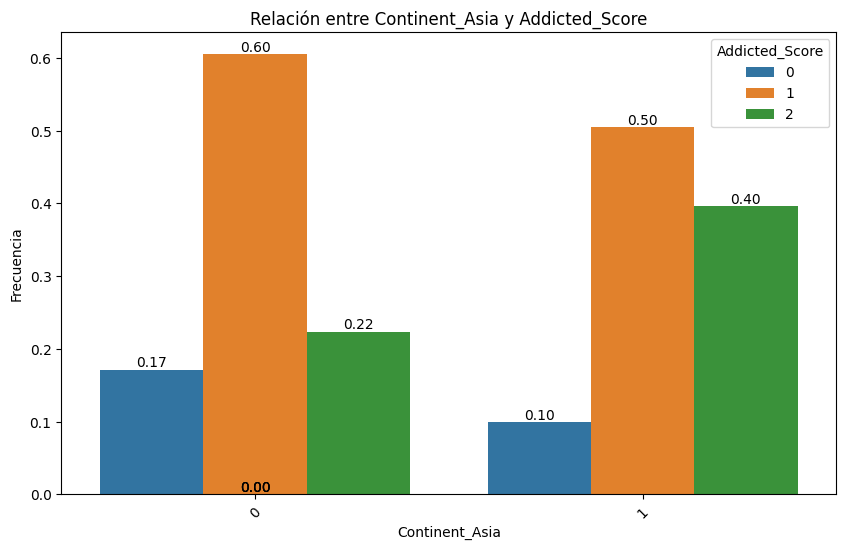

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


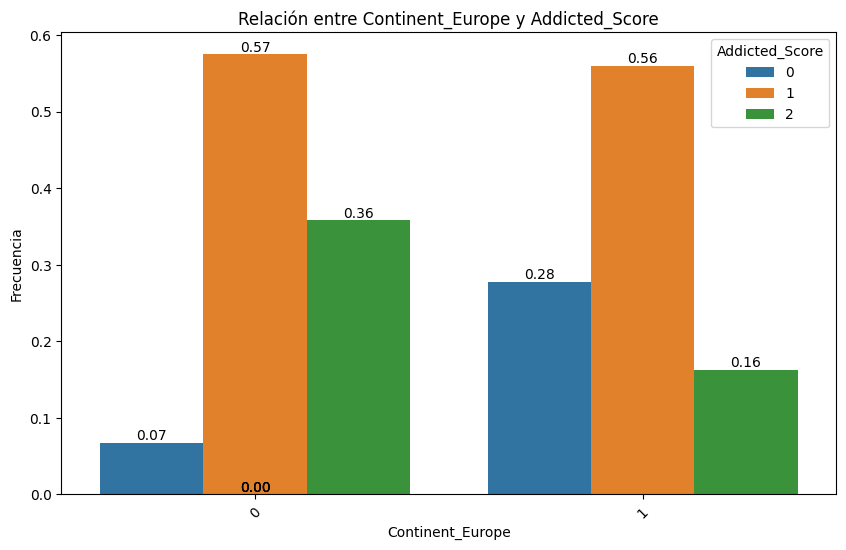

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


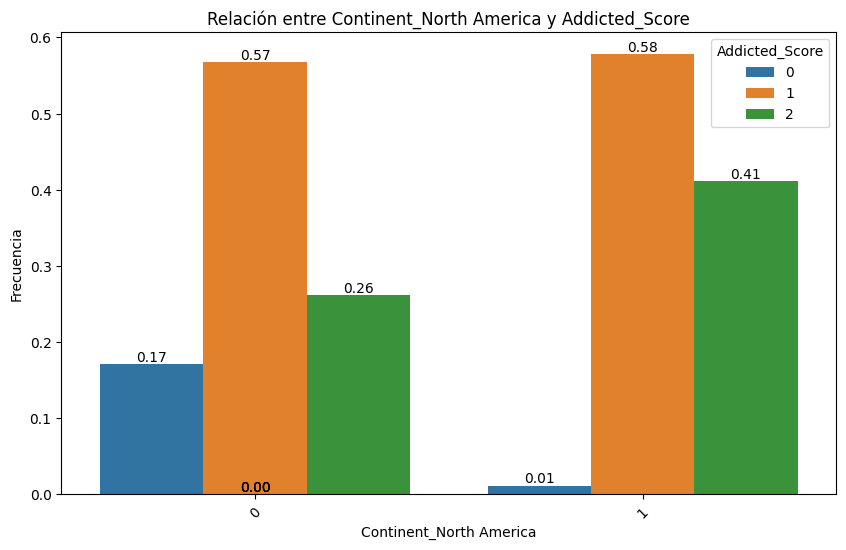

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


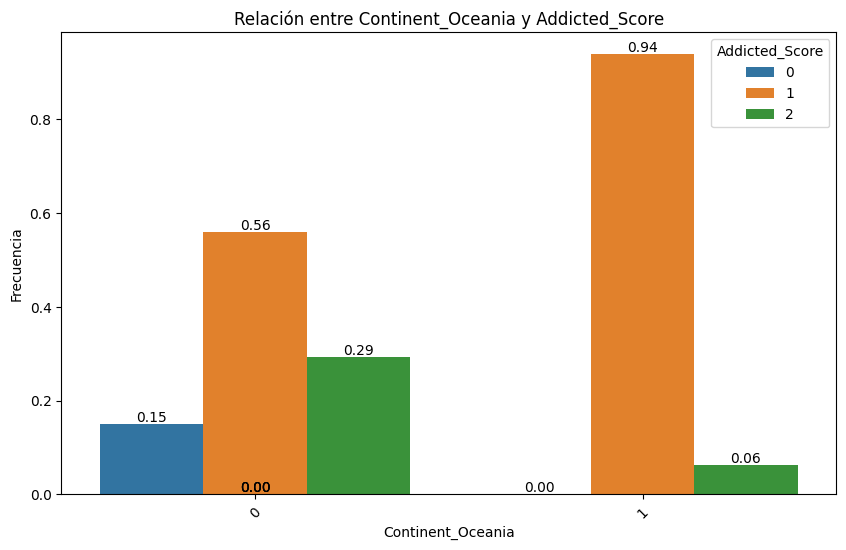

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


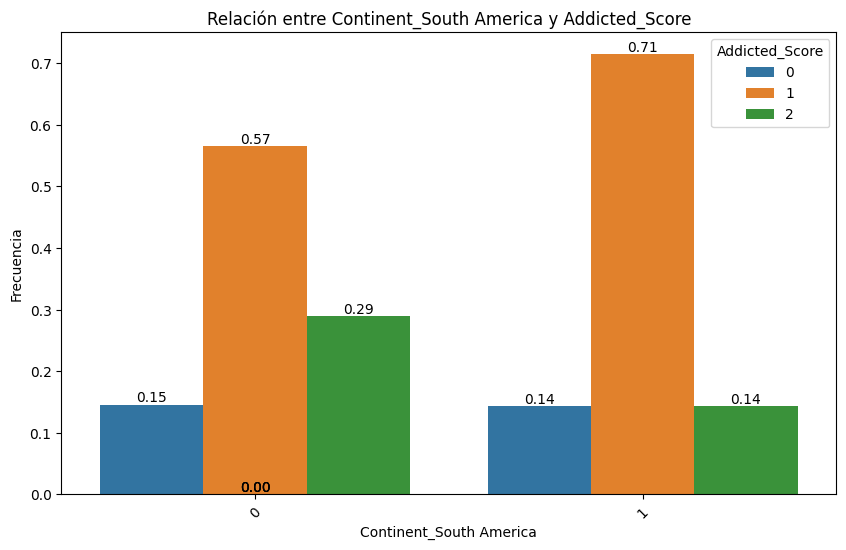

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


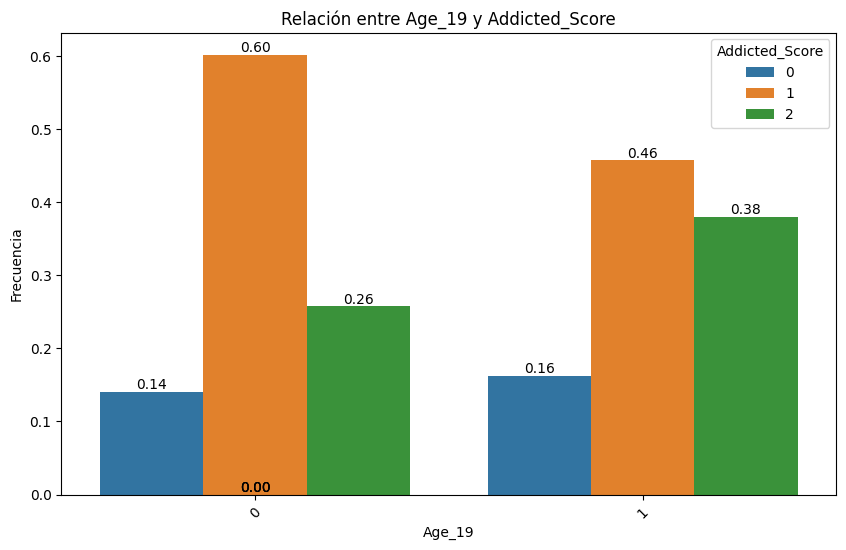

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


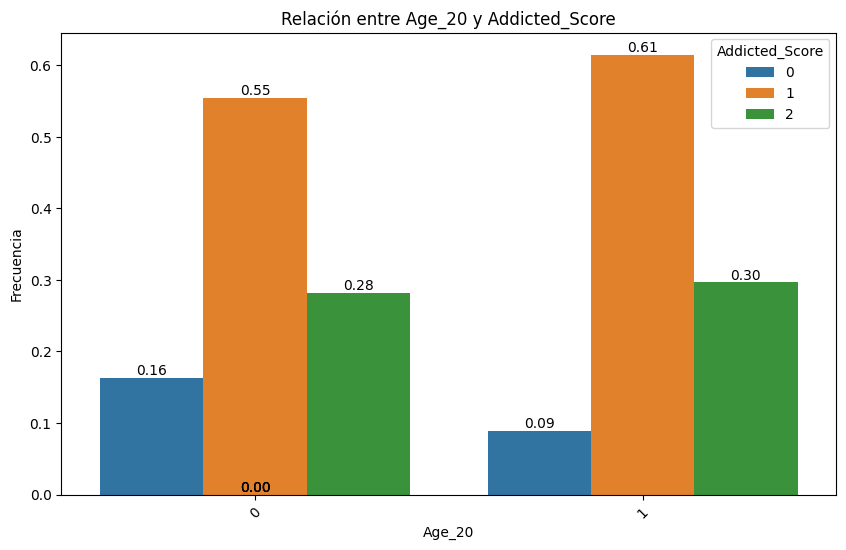

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


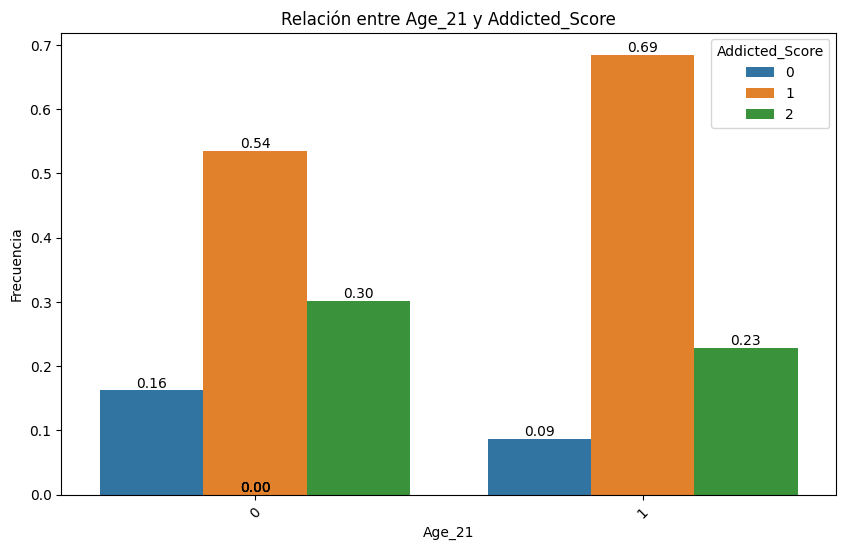

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


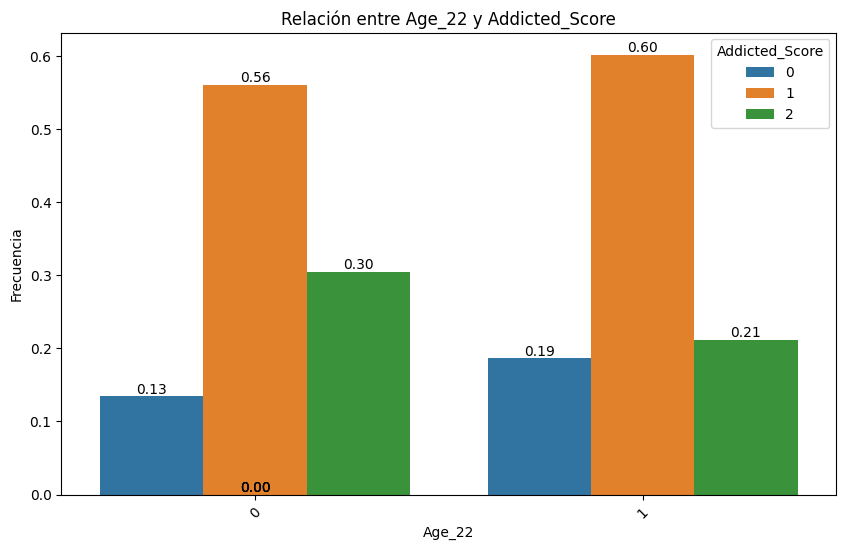

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


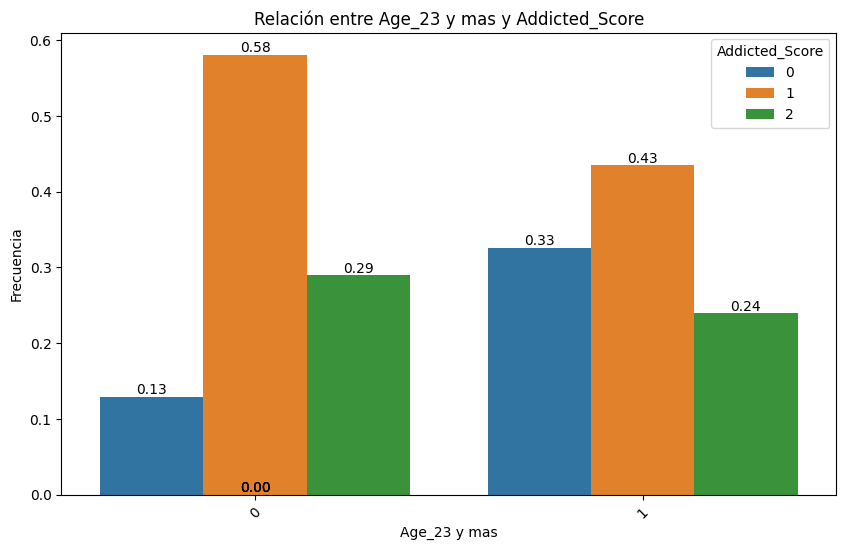

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


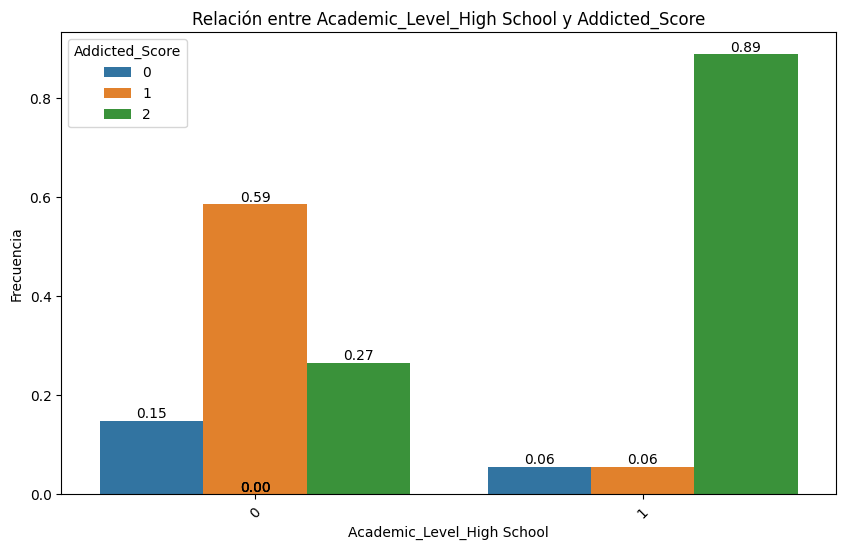

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


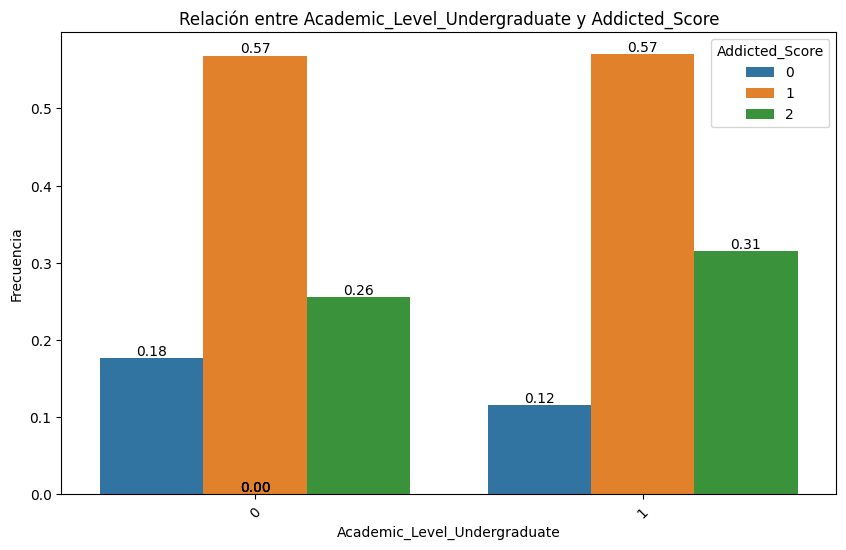

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


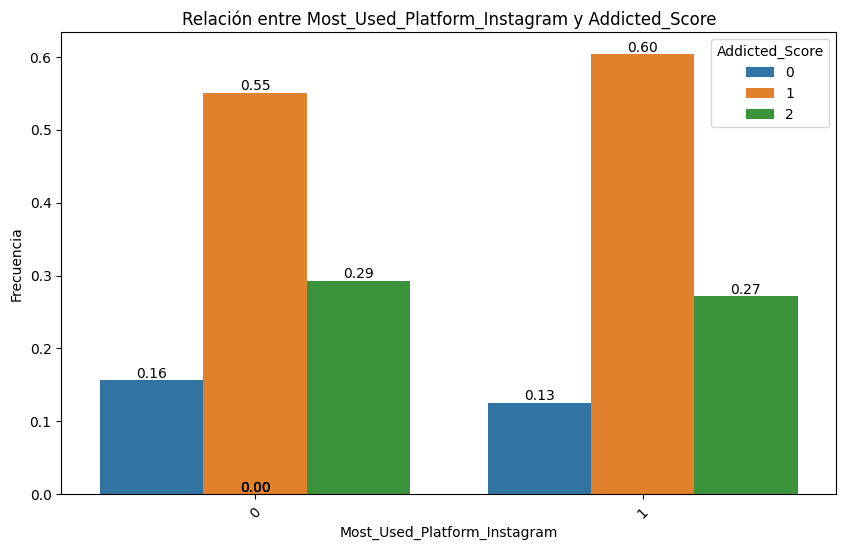

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


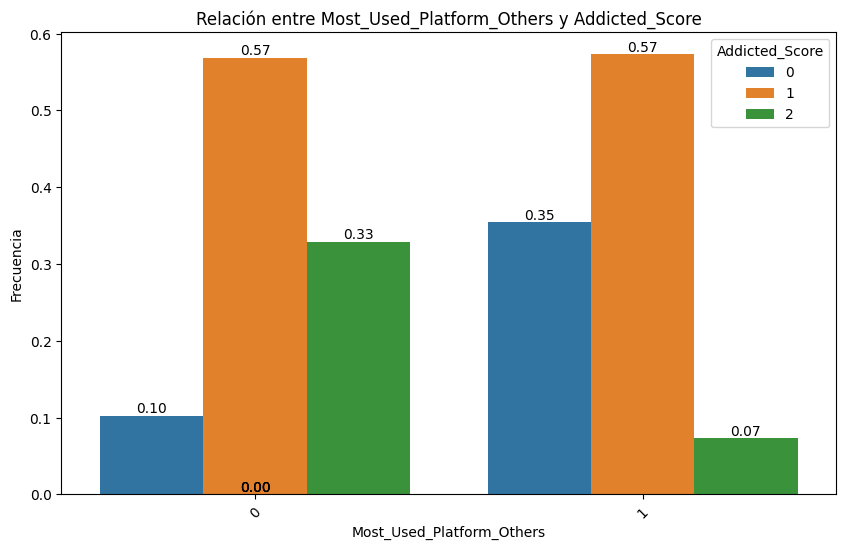

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


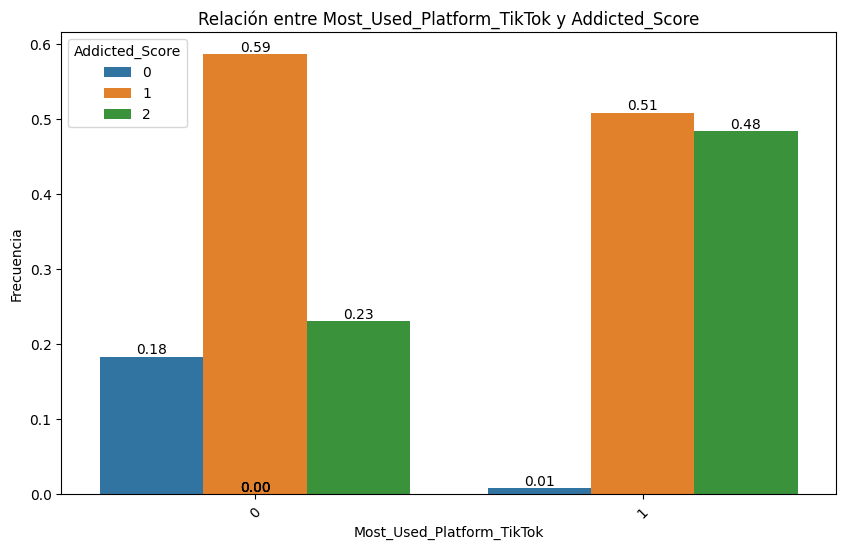

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


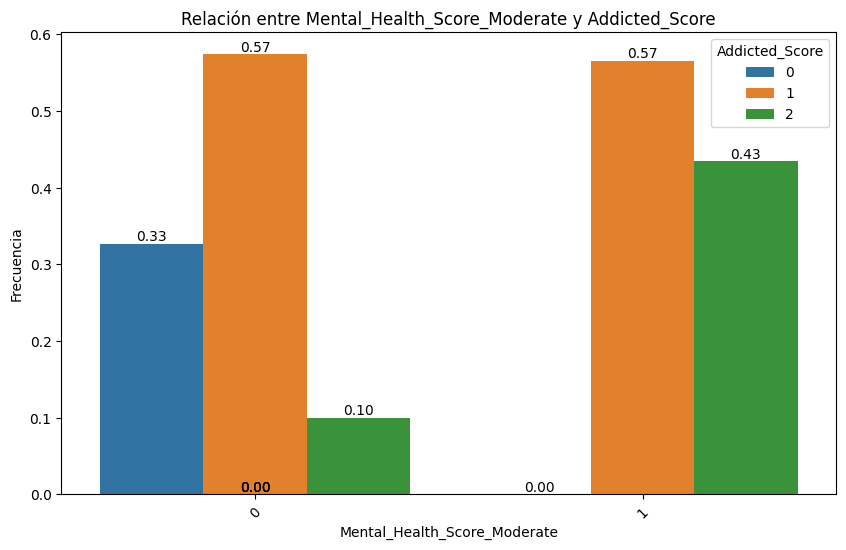

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


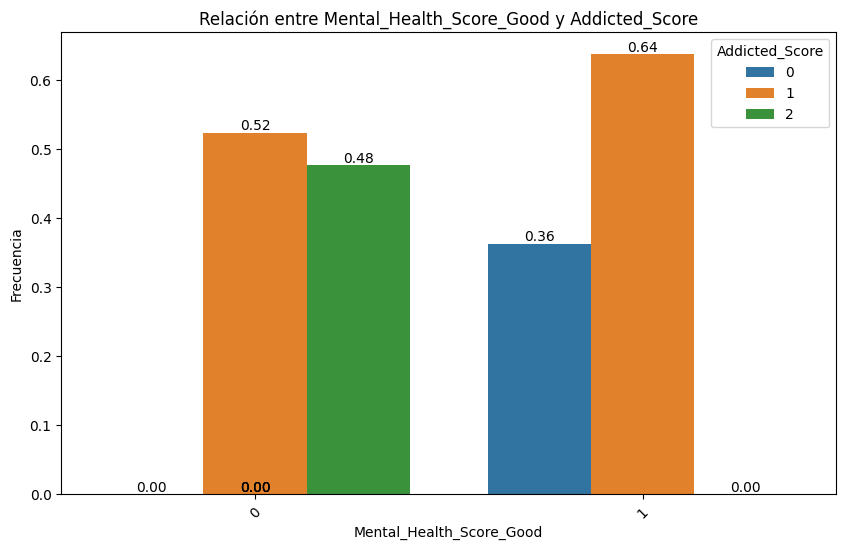

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


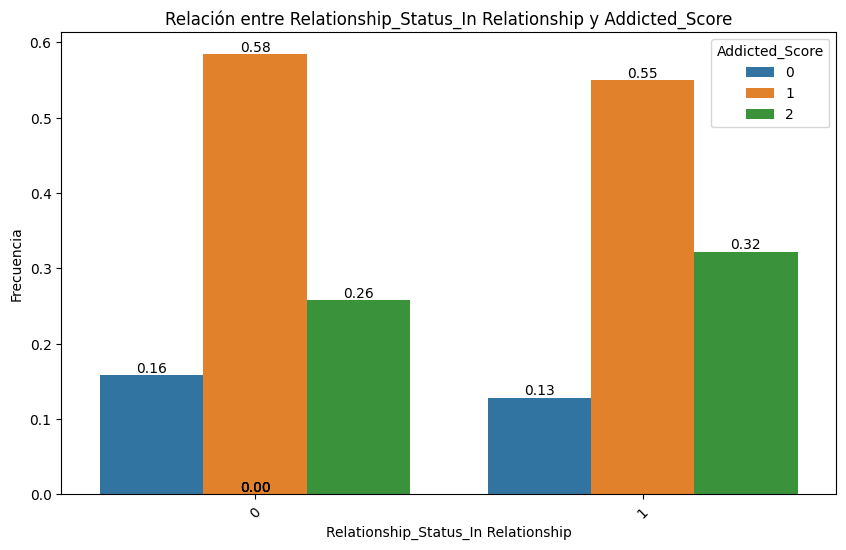

c:\Users\Usuario\Desktop\Bootcamp\ML_Addicciones_a_redes_sociales_vf\src/utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


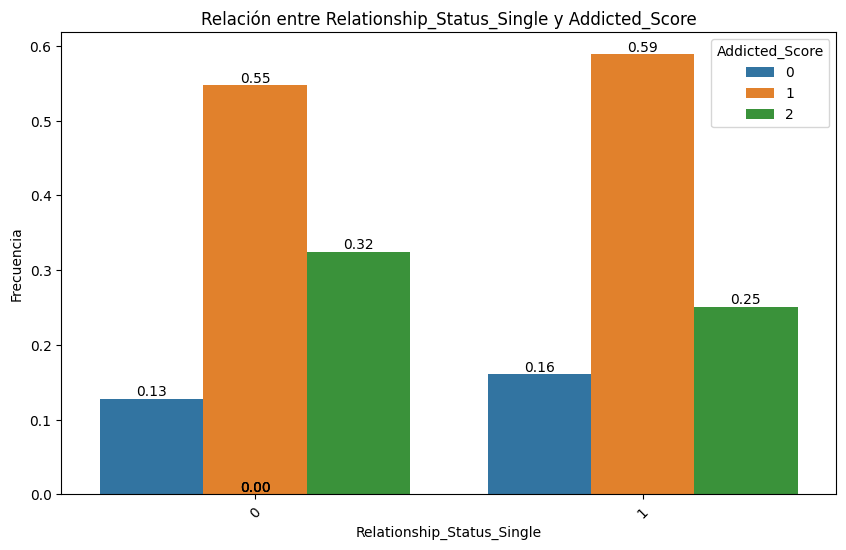

In [138]:
new_features_important_cat= []
new_less_important_features= []
for col in new_categoric:
    bt.plot_categorical_relationship_fin(train_set, col,target, show_values= True, relative_freq= True);

In [139]:
new_features_important_cat+=["Age_19","Age_23 y mas", "Affects_Academic_Performance", "Conflicts_Over_Social_Media", "Continent_Europe", "Continent_North America", "Continent_Oceania","Continent_South America", "Academic_Level_High School", "Mental_Health_Score_Good", "Mental_Health_Score_Moderate", "Most_Used_Platform_TikTok", "Most_Used_Platform_Others"]
new_features_important_cat

['Age_19',
 'Age_23 y mas',
 'Affects_Academic_Performance',
 'Conflicts_Over_Social_Media',
 'Continent_Europe',
 'Continent_North America',
 'Continent_Oceania',
 'Continent_South America',
 'Academic_Level_High School',
 'Mental_Health_Score_Good',
 'Mental_Health_Score_Moderate',
 'Most_Used_Platform_TikTok',
 'Most_Used_Platform_Others']

In [140]:
def cramers_v(x, y):
    # Contingency table
    confusion = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion, correction=False)[0]
    n = confusion.sum().sum()
    k = min(confusion.shape)
    return np.sqrt(chi2 / (n * (k - 1)))


results = []
comb_col = new_features_important_cat + [target]
for feat1, feat2 in combinations(comb_col, 2):
    v = cramers_v(train_set[feat1], train_set[feat2])
    results.append({
        'Fear1': feat1,
        'Feat2': feat2,
        'CramersV': v
    })

df_cramers = pd.DataFrame(results).sort_values('CramersV', ascending=False)
df_cramers.loc[df_cramers["CramersV"]>0.1]

,Fear1,Feat2,CramersV
25,Affects_Academic_Performance,Conflicts_Over_Social_Media,0.988477
81,Mental_Health_Score_Good,Mental_Health_Score_Moderate,0.913127
31,Affects_Academic_Performance,Mental_Health_Score_Good,0.899490
41,Conflicts_Over_Social_Media,Mental_Health_Score_Good,0.893847
42,Conflicts_Over_Social_Media,Mental_Health_Score_Moderate,0.848450
32,Affects_Academic_Performance,Mental_Health_Score_Moderate,0.821348
45,Conflicts_Over_Social_Media,Addicted_Score,0.820494
35,Affects_Academic_Performance,Addicted_Score,0.650728
84,Mental_Health_Score_Good,Addicted_Score,0.643232
87,Mental_Health_Score_Moderate,Addicted_Score,0.527610


In [141]:
features_important_num

['Avg_Daily_Usage_Hours']

In [142]:
most_important_features = ["Mental_Health_Score_Good", "Conflicts_Over_Social_Media","Most_Used_Platform_Others", "Continent_Europe"]+ features_important_num
most_important_features

['Mental_Health_Score_Good',
 'Conflicts_Over_Social_Media',
 'Most_Used_Platform_Others',
 'Continent_Europe',
 'Avg_Daily_Usage_Hours']

***6. Primer Baseline Model***

In [143]:

X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [144]:
rfc = RandomForestClassifier( random_state=42,)
baseline = np.mean(cross_val_score(rfc,X_train,y_train, scoring = "balanced_accuracy", cv = 5))
print(f"Baseline: {baseline}%")

Baseline: 0.9404929670003199%


In [145]:
#Aplicamos un SMOTE para el balanceo del target, aseguremos asi el buen entrenamiento tambien de las clases minoritarias
sm = SMOTE(random_state=42)
X_smoted, y_smoted = sm.fit_resample(X_train, y_train)

rfc_smote = RandomForestClassifier(random_state=42, )
baseline_smoted = np.mean(cross_val_score(rfc_smote,X_smoted,y_smoted, scoring = "balanced_accuracy", cv = 5))
print(f"Baseline_smoted: {baseline_smoted}%")

Baseline_smoted: 0.9896474358974359%


In [146]:
X_smoted


,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Conflicts_Over_Social_Media,Gender_female,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,...,Age_23 y mas,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_Others,Most_Used_Platform_TikTok,Mental_Health_Score_Moderate,Mental_Health_Score_Good,Relationship_Status_In Relationship,Relationship_Status_Single
0,3.200000,0,6.900000,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,4.200000,1,7.400000,4,1,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,6.300000,1,4.400000,4,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
3,6.600000,1,5.600000,4,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2.900000,0,8.900000,2,1,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,5.646736,1,5.453264,4,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
959,5.879005,1,5.213997,4,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
960,6.292958,1,6.300000,4,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
961,6.937324,1,5.862676,4,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [147]:
sm = SMOTE(random_state=42)
X_smoted_feat_selec, y_smoted = sm.fit_resample(X_train[most_important_features], y_train)

rfc_smote = RandomForestClassifier(random_state=42, )
baseline_smoted_feat_selec = np.mean(cross_val_score(rfc_smote,X_smoted[most_important_features],y_smoted, scoring = "balanced_accuracy", cv = 5))
print(f"Baseline_smoted_feat_selec: {baseline_smoted_feat_selec}%", "con solo", {len(most_important_features)}, "features de " ,{len(X_train.columns.to_list())})

Baseline_smoted_feat_selec: 0.9262019230769232% con solo {5} features de  {24}


| Vesion Modelo | Metrica | Resultado | Numero de columnas | 
| --------------| ------- |-----------|--------------------|
| Random Forest clf         | Balanced accuracy | 0.9404  | 24 |
| Random Forest clf + SMOTE | Balanced accuracy | 0.9896  | 24 | 
| Random Forest clf + SMOTE | Balanced accuracy | 0.9323  |  5|


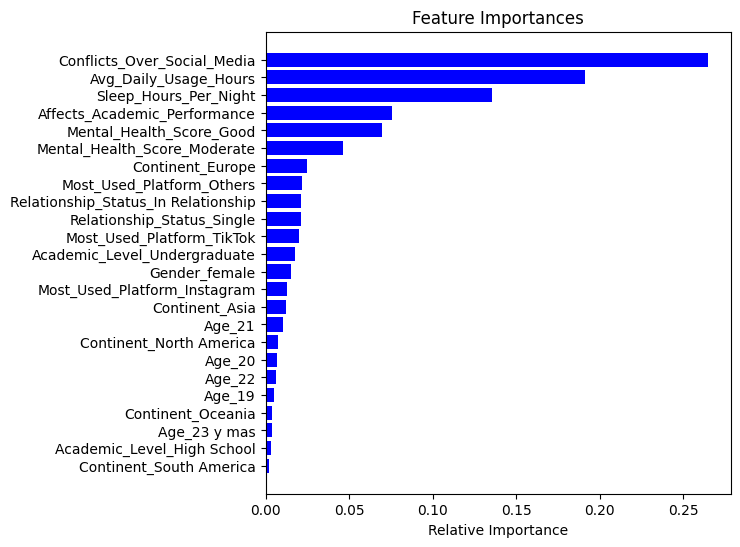

In [148]:
rfc_smote.fit(X_smoted,y_smoted)
importances=rfc_smote.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [149]:
feature_names = X_smoted.columns
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
top6_random_forest = feat_imp.head(6)['feature'].tolist()
top6_random_forest

['Conflicts_Over_Social_Media',
 'Avg_Daily_Usage_Hours',
 'Sleep_Hours_Per_Night',
 'Affects_Academic_Performance',
 'Mental_Health_Score_Good',
 'Mental_Health_Score_Moderate']

In [150]:
from sklearn.feature_selection import mutual_info_classif
X_smoted_mut = X_smoted[new_categoric]
selector = SelectKBest(mutual_info_classif, k=10)
x_kbest = selector.fit_transform(X_smoted_mut, y_smoted)
mutual_info = pd.DataFrame(x_kbest, columns = selector.get_feature_names_out())
select_mutual_info_features= mutual_info.columns
select_mutual_info_features

Index(['Affects_Academic_Performance', 'Conflicts_Over_Social_Media',
       'Continent_Europe', 'Continent_North America', 'Age_23 y mas',
       'Academic_Level_High School', 'Most_Used_Platform_Others',
       'Most_Used_Platform_TikTok', 'Mental_Health_Score_Moderate',
       'Mental_Health_Score_Good'],
      dtype='object')

In [151]:
# con los one hot encoding, se nos ha generado muchas nuevas features, vamos a intentar reducir para ver si mejoramos el modelo base

*** 7. Seleccion de Features***

In [152]:
# RECURSIVE FEATURE ELIMINATION (RFE)

rfc_3 = RandomForestClassifier( random_state=42)

#Recursive Feature Elimination y entrenar el modelo
features_rfe = 10
rfe = RFE(estimator=rfc_3, n_features_to_select= features_rfe, step=1)
rfe = rfe.fit(X_smoted, y_smoted)
X_smoted_rfe = rfe.transform(X_smoted)

rfe_score = np.mean(cross_val_score(rfc_3, X_smoted_rfe, y_smoted, cv = 5, scoring= "balanced_accuracy"))

print(f"RFE: {rfe_score*100.0}%/{features_rfe} feats. vs Baseline: {baseline*100.0}%/{len(X_smoted.columns)} feats.")

RFE: 97.82371794871794%/10 feats. vs Baseline: 94.04929670003199%/24 feats.


In [153]:
features_rfe = rfe.get_feature_names_out()
features_rfe

array(['Avg_Daily_Usage_Hours', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Conflicts_Over_Social_Media',
       'Gender_female', 'Continent_Europe', 'Most_Used_Platform_Others',
       'Mental_Health_Score_Moderate', 'Mental_Health_Score_Good',
       'Relationship_Status_In Relationship'], dtype=object)

In [154]:
from sklearn.feature_selection import RFECV

rfc_4 = RandomForestClassifier(random_state=42) 
rfecv = RFECV(estimator=rfc_4, step=1, cv=5,scoring='balanced_accuracy')
rfecv = rfecv.fit(X_smoted, y_smoted)

features_RFECV= rfecv.get_feature_names_out()
print('Optimal number of features :', rfecv.n_features_)
#print('Best features :', list(X_smoted.columns[rfecv.support_]))
#print("Best features (alternative:", rfecv.get_feature_names_out())
print('Accuracy feat. reduction 4:', np.mean(cross_val_score(rfc_4, X_smoted[rfecv.get_feature_names_out()],y_smoted, cv = 5, scoring = "balanced_accuracy")))

Optimal number of features : 24
Accuracy feat. reduction 4: 0.9896474358974359


In [155]:
# Instanciamos modelos
log_reg_pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight="balanced", random_state=42))
knn_pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5, weights='distance'))
dtc= DecisionTreeClassifier(class_weight='balanced', random_state=42)
gbc = GradientBoostingClassifier( random_state=42)
xgb = XGBClassifier(objective='multi:softprob',    random_state=42, num_class= 3)  # para adaptación al multi-clase de mi target
lgb = LGBMClassifier(class_weight='balanced', random_state=42, verbose = -1)
cb = CatBoostClassifier( auto_class_weights='Balanced',random_state=42,verbose=0  )
rdf = RandomForestClassifier(random_state=42, class_weight= 'balanced')


In [156]:
listas_features = {
    "top6_random_forest": top6_random_forest,
    "select_mutual_info_features": select_mutual_info_features,
    "features_rfe": features_rfe,
    "features_RFECV": features_RFECV,
    "most_important_features": most_important_features
}

resultado = []
for nombre_lista, lista in listas_features.items():
    for nombre, modelo in zip(["Logistic Regresion","KNN", "Decision tree Classifier", "Gardient Boosting", "XGB Classifier", "Light BGM", "CatBoost","Random Forest"],
                              [log_reg_pipe, knn_pipe, dtc, gbc, xgb, lgb,cb,rdf]):
        score= np.mean(cross_val_score(modelo, X_smoted[lista], y_smoted, cv = 5, scoring = "balanced_accuracy"))
        resultado.append({
            "feature_list": nombre_lista,
            "list_len": len(lista),
            "model": nombre,
            "balanced_accuracy": score*100
        })
df_resultados = pd.DataFrame(resultado)
df_resultados.sort_values(by='balanced_accuracy', ascending=False).reset_index(drop=True)   

,feature_list,list_len,model,balanced_accuracy
0,features_RFECV,24,Random Forest,98.862179
1,features_RFECV,24,CatBoost,98.447115
2,features_RFECV,24,Light BGM,98.341346
3,features_RFECV,24,Gardient Boosting,98.232372
4,features_RFECV,24,XGB Classifier,98.134615
5,features_rfe,10,Random Forest,97.823718
6,features_rfe,10,CatBoost,97.615385
7,features_rfe,10,Light BGM,97.612179
8,features_rfe,10,XGB Classifier,97.511218
9,features_rfe,10,KNN,97.096154


In [157]:
# por el tiempo de ejecucion de y los resultdos obtenido, nos quedaremos con el random Forest con 10 features de la lista "features-rfe", ya que tiene muy buena metrica. 
# ahora vamos a pasar a optimizarlo.

# LINEA 5 del df_resultados : Random Forest  + features_rfe

In [158]:

params = {
    'max_depth': [ 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators' : [50, 100, 200]
}

dt = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(
        dt, 
        param_grid=params, 
        scoring='balanced_accuracy', 
        cv=5, 
        n_jobs=-1
        )
grid_search.fit(X_smoted[features_rfe], y_smoted)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='balanced_accuracy')

In [159]:


best_model = grid_search.best_estimator_  # el modelo entrenado
y_pred = best_model.predict(X_test[features_rfe])
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Mejores hiperparámetros: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor score: 0.980304487179487


In [160]:
from sklearn.metrics import balanced_accuracy_score
test_balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy (Test): {test_balanced_acc*100:.2f}%")

Balanced Accuracy (Test): 95.12%


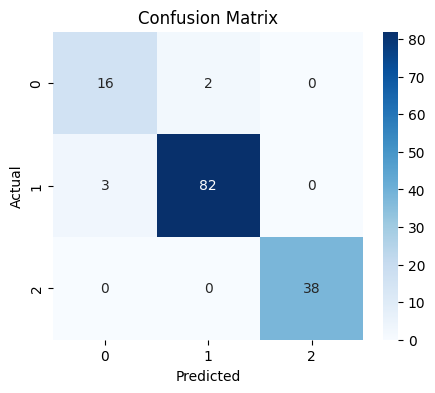

In [161]:
# EVALUACION DEL MODELO

matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('./src/img/matriz_confusion.png')

In [162]:
# sobre 39 predecicdo como addicted, solo 1 lo esta de manera moderada
# sobre 27 predecidos como no addicted, 10 son moderados
# sobre 75 predecidos como moderados, solo1 no esta adicted. 
# el modelo predice mejor los adicted, lo que es lo que queremos como negoscio porque es alli que queremos poder acutar y preever medidas precvnetivas. 
# por lo tanto tb es necesario saber las features mas improtantes para ello. 



In [163]:
features_rfe

array(['Avg_Daily_Usage_Hours', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Conflicts_Over_Social_Media',
       'Gender_female', 'Continent_Europe', 'Most_Used_Platform_Others',
       'Mental_Health_Score_Moderate', 'Mental_Health_Score_Good',
       'Relationship_Status_In Relationship'], dtype=object)

In [164]:
# Guardar el modelo
import joblib
joblib.dump(best_model, './src/models/modelo_optimizado.pkl')

['./src/models/modelo_optimizado.pkl']